# <font color = green>Lending Club Case Study - EDA<font>

##### <font color = green> By:<font> 
<font color = blue>    **1. Himanshu Srivastava (Group Facilitator)**<font> <br>
<font color = blue>    **2. Pragati Kamlakar Shinde**<font><font> 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = blue>Project Overview:</font>

You work for a **consumer finance company** which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile.

Two **types of risks** are associated with the bank’s decision:

 - If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company.
 - If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company
 
When a person applies for a loan, there are **two types of decisions** that could be taken by the company:

<font color = "maroon">**1. Loan accepted:**</font> If the company approves the loan, there are 3 possible scenarios described below:

* **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

* **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

* **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

<font color = "maroon">**2. Loan rejected:**</font> The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Points to Remember:

1. Borrowers who **defaults** is the largest source of financial loss to the lenders i.e. Credit Loss.
2. The customers labelled as **'charged-off'** are considered as **'defaulters'**. 

## Project Objective:

- Identification of **risky loans** and **default** applicants using EDA.
- Use EDA to understand how **consumer attributes** and **loan attributes** influence the tendency of **default**.
- Identify the **driving factors (or driver variables)** for loan defaulters.

**<font color="maroon">Input Data:</font>**
- **Loan Data Set:** Contains the complete loan data for all loans issued through the time period **2007** to **2011**.
- **Loan Data dictionary:** Data dictionary which describes the meaning of all the variables present in loan data set.

===================================================================================================================
 `Let's start the Assignment`

===================================================================================================================

In [1]:
#import all required Python libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Added to print data on current window screen
%matplotlib inline

#Added to avoid warning and not to display on notebook
import warnings
warnings.filterwarnings("ignore")

In [2]:
#supress scientific notation of values
pd.options.display.float_format = '{:.2f}'.format

#increasing max number of columns and rows  displayed with pandas.
pd.set_option('display.max_columns', 150)
pd.set_option('display.max_rows', 100)

In [3]:
# Now load loan.csv in DataFrames as "loan"
# To avoid any encoding and special character issues use below 
#using low memory flag to load columns with multiple data types.
loan = pd.read_csv("./loan.csv", encoding = "ISO-8859-1", low_memory=False)

**Initial analysis on DataFrames**

In [4]:
#Check the shape, info of both dataframes
print("No. of Rows and Columns in Loan DataFrame:", loan.shape)

No. of Rows and Columns in Loan DataFrame: (39717, 111)


In [5]:
#Check Metadata using info() of loan DataFrame
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [6]:
#Display the data of loan dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.00,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.00,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,nan,nan,3,0,13648,83.70%,9,f,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
1,1077430,1314167,2500,2500,2500.00,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,nan,nan,3,0,1687,9.40%,4,f,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
2,1077175,1313524,2400,2400,2400.00,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.00,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,nan,nan,2,0,2956,98.50%,10,f,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan
3,1076863,1277178,10000,10000,10000.00,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.00,nan,10,0,5598,21%,37,f,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,

In [7]:
#Display random data of loan dataframe
loan.sample()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
19637,671941,858951,8000,8000,8000.00,36 months,14.91%,276.98,D,D2,Veteran's Healthcare Administration,10+ years,MORTGAGE,99085.00,Verified,Feb-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,Mothers Home Repair,891xx,NV,10.72,0,Feb-91,1,29.00,nan,14,0,17353,63.10%,48,f,0.00,0.00,8291.79,8291.79,8000.00,291.79,0.00,0.00,0.00,May-11,7740.14,NaN,Apr-16,0.00,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0.00,0.00,nan,nan,nan,nan


In [8]:
#Display tail data of loan dataframe
loan.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.00,36 months,8.07%,78.42,A,A4,FiSite Research,4 years,MORTGAGE,110000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Our current gutter system on our home is old a...,home_improvement,Home Improvement,802xx,CO,11.33,0,Nov-90,0,0.00,0.00,13,0,7274,13.10%,40,f,0.00,0.00,2822.97,1213.88,2500.00,322.97,0.00,0.00,0.00,Jul-10,80.90,NaN,Jun-10,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39713,90665,90607,8500,8500,875.00,36 months,10.28%,275.38,C,C1,"Squarewave Solutions, Ltd.",3 years,RENT,18000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,The rate of interest and fees incurred by carr...,credit_card,Retiring credit card debt,274xx,NC,6.40,1,Dec-86,1,5.00,0.00,6,0,8847,26.90%,9,f,0.00,0.00,9913.49,1020.51,8500.00,1413.49,0.00,0.00,0.00,Jul-10,281.94,NaN,Jul-10,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39714,90395,90390,5000,5000,1325.00,36 months,8.07%,156.84,A,A4,NaN,< 1 year,MORTGAGE,100000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,debt_consolidation,MBA Loan Consolidation,017xx,MA,2.30,0,Oct-98,0,0.00,0.00,11,0,9698,19.40%,20,f,0.00,0.00,5272.16,1397.12,5000.00,272.16,0.00,0.00,0.00,Apr-08,0.00,NaN,Jun-07,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
39715,90376,89243,5000,5000,650.00,36 months,7.43%,155.38,A,A2,NaN,< 1 year,MORTGAGE,200000.00,Not Verified,Jul-07,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,other,JAL Loan,208xx,MD,3.72,0,Nov-88,0,0.00,0.00,17,0,85607,0.70%,26,f,0.00,0.00,5174.20,672.66,5000.00,174.20,0.00,0.00,0.00,Jan-08,0.00,NaN,Jun-07,nan,nan,1,INDIVIDUAL,nan,nan,nan,0,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,0,nan,nan,nan,nan,nan,nan

In [9]:
print("Metadata of companies DataFrame:\n")
loan.describe().transpose()      

Metadata of companies DataFrame:



,count,mean,std,min,25%,50%,75%,max
id,39717.00,683131.91,210694.13,54734.00,516221.00,665665.00,837755.00,1077501.00
member_id,39717.00,850463.56,265678.31,70699.00,666780.00,850812.00,1047339.00,1314167.00
loan_amnt,39717.00,11219.44,7456.67,500.00,5500.00,10000.00,15000.00,35000.00
funded_amnt,39717.00,10947.71,7187.24,500.00,5400.00,9600.00,15000.00,35000.00
funded_amnt_inv,39717.00,10397.45,7128.45,0.00,5000.00,8975.00,14400.00,35000.00
installment,39717.00,324.56,208.87,15.69,167.02,280.22,430.78,1305.19
annual_inc,39717.00,68968.93,63793.77,4000.00,40404.00,59000.00,82300.00,6000000.00
dti,39717.00,13.32,6.68,0.00,8.17,13.40,18.60,29.99
delinq_2yrs,39717.00,0.15,0.49,0.00,0.00,0.00,0.00,11.00
inq_last_6mths,39717.00,0.87,1.07,0.00,0.00,1.00,1.00,8.00


========================================================================================================================
## <font color = "maroon">Data Cleaning</font>
========================================================================================================================

`Based on above data analysis, looks like there are lot of columns which doesn't contains any data. Let's identify those and then take necessary action.`

In [10]:
#Missing values per column expressed in terms of percentage of total number of values
null_data_1 = round(100*(loan.isnull().sum()/len(loan.id)), 2)
#Listing down all columns which have more than 0% missing values
null_data_1.loc[null_data_1 > 0]

emp_title                          6.19
emp_length                         2.71
desc                              32.58
title                              0.03
mths_since_last_delinq            64.66
mths_since_last_record            92.99
revol_util                         0.13
last_pymnt_d                       0.18
next_pymnt_d                      97.13
last_credit_pull_d                 0.01
collections_12_mths_ex_med         0.14
mths_since_last_major_derog      100.00
annual_inc_joint                 100.00
dti_joint                        100.00
verification_status_joint        100.00
tot_coll_amt                     100.00
tot_cur_bal                      100.00
open_acc_6m                      100.00
open_il_6m                       100.00
open_il_12m                      100.00
open_il_24m                      100.00
mths_since_rcnt_il               100.00
total_bal_il                     100.00
il_util                          100.00
open_rv_12m                      100.00


`From the above outcome, we can see that we have more columns with 100% null or missing values. So let's target to remove all those column where 50% data is missing` 

In [11]:
# removing the columns having more than 50% missing values
missing_columns_1 = loan.columns[100*(loan.isnull().sum()/len(loan.index)) >= 50]
print(missing_columns_1)

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [12]:
#Let's count the number of columns which we need to remove
len(missing_columns_1)

57

**So there are 57 column where 50% data is NULL. Let's remove all data.**

In [13]:
#Current shape of dataframe
loan.shape

(39717, 111)

In [14]:
#After deleting 57 columns
loan = loan.drop(missing_columns_1,axis=1)
loan.shape

(39717, 54)

**After removing such columns, 54 columns remain. Let's do further analysis for missing values.**

In [15]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
desc                           object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_

`Seeing above data, "int_rate" is showing as "object" data type. As per the data dictionary, this field is "Interest Rate on Loan" so need to convert it to float data type for easy calculation.`

In [16]:
#The column int_rate is character type, let's convert it to float
loan.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
4    12.69%
Name: int_rate, dtype: object

In [17]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [18]:
#Verify above result
loan.int_rate.head()

0   10.65
1   15.27
2   15.96
3   13.49
4   12.69
Name: int_rate, dtype: float64

In [19]:
#Missing values per column expressed in terms of percentage of total number of values
null_data_2 = round(100*(loan.isnull().sum()/len(loan.id)), 2)
#Listing down all columns which have more than 0% missing values
null_data_2.loc[null_data_2 > 0]

emp_title                     6.19
emp_length                    2.71
desc                         32.58
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

Still some columns contains NULL data. Let's now remove **"desc"** column as an equivalent short and concise information is present in the **"purpose"** and **"title"** column of the data.


In [20]:
#Current shape of dataframe
loan.shape

(39717, 54)

In [21]:
#After deleting "desc" columns
loan = loan.drop('desc', axis=1)
loan.shape

(39717, 53)

**After removing "desc" columns, 53 columns remain. Let's continue further analysis for missing values.**

In [22]:
#Missing values per column expressed in terms of percentage of total number of values
null_data_3 = round(100*(loan.isnull().sum()/len(loan.id)), 2)
#Listing down all columns which have more than 0% missing values
null_data_3.loc[null_data_3 > 0]

emp_title                    6.19
emp_length                   2.71
title                        0.03
revol_util                   0.13
last_pymnt_d                 0.18
last_credit_pull_d           0.01
collections_12_mths_ex_med   0.14
chargeoff_within_12_mths     0.14
pub_rec_bankruptcies         1.75
tax_liens                    0.10
dtype: float64

In [23]:
#Finding number of unique values in each column
loan.nunique().sort_values().head(15)

tax_liens                     1
delinq_amnt                   1
chargeoff_within_12_mths      1
acc_now_delinq                1
application_type              1
policy_code                   1
collections_12_mths_ex_med    1
initial_list_status           1
pymnt_plan                    1
term                          2
pub_rec_bankruptcies          3
verification_status           3
loan_status                   3
pub_rec                       5
home_ownership                5
dtype: int64

In [24]:
#Display the number of the unique values with count "1" for each of the above column
print("Tax_liens:",loan.tax_liens.unique())
print(loan.tax_liens.value_counts().to_string(),"\n")

print("delinq_amnt:",loan.delinq_amnt.unique())
print(loan.delinq_amnt.value_counts().to_string(),"\n")

print("chargeoff_within_12_mths:",loan.chargeoff_within_12_mths.nunique())
print(loan.chargeoff_within_12_mths.value_counts().to_string(),"\n")

print("acc_now_delinq:",loan.acc_now_delinq.unique())
print(loan.acc_now_delinq.value_counts().to_string(),"\n")

print("application_type:",loan.application_type.unique())
print(loan.application_type.value_counts().to_string(),"\n")

print("policy_code:",loan.policy_code.unique())
print(loan.policy_code.value_counts().to_string(),"\n")

print("collections_12_mths_ex_med:",loan.collections_12_mths_ex_med.unique())
print(loan.collections_12_mths_ex_med.value_counts().to_string(),"\n")

print("initial_list_status:",loan.initial_list_status.unique())
print(loan.initial_list_status.value_counts().to_string(),"\n")

print("pymnt_plan:",loan.pymnt_plan.unique())
print(loan.pymnt_plan.value_counts().to_string(),"\n")

Tax_liens: [ 0. nan]
0.00    39678 

delinq_amnt: [0]
0    39717 

chargeoff_within_12_mths: 1
0.00    39661 

acc_now_delinq: [0]
0    39717 

application_type: ['INDIVIDUAL']
INDIVIDUAL    39717 

policy_code: [1]
1    39717 

collections_12_mths_ex_med: [ 0. nan]
0.00    39661 

initial_list_status: ['f']
f    39717 

pymnt_plan: ['n']
n    39717 



Based on above result, These are all **categorical variables**.

1. Now since the values in below column 
    - **collections_12_mths_ex_med**
    - **chargeoff_within_12_mths**
    - **tax_liens** <br>
    
      is *0* or *NaN*. The range of values that these categorical columns can take is not of any significant impact to the           analysis. Hence we are going to drop these columns as there is no impact on our analysis.

In [25]:
#Current shape of dataframe
loan.shape

(39717, 53)

In [26]:
#After dropping columns
columns_to_drop = ['collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens']
loan = loan.drop(columns_to_drop,axis=1)
loan.shape

(39717, 50)

**After removing above columns, 50 columns remain. Let's continue further analysis for missing values.**

In [27]:
#Missing values per column expressed in terms of percentage of total number of values
null_data_4 = round(100*(loan.isnull().sum()/len(loan.id)), 2)
#Listing down all columns which have more than 0% missing values
null_data_4.loc[null_data_4 > 0]

emp_title              6.19
emp_length             2.71
title                  0.03
revol_util             0.13
last_pymnt_d           0.18
last_credit_pull_d     0.01
pub_rec_bankruptcies   1.75
dtype: float64

**pub_rec_bankruptcies** categorical column contains with 1.76% missing data. It tells us about the past number of public record bankruptcies of that borrower. 

In [28]:
loan.pub_rec_bankruptcies.value_counts()

0.00    37339
1.00     1674
2.00        7
Name: pub_rec_bankruptcies, dtype: int64

Based on above data, **pub_rec_bankruptcies** only contains three values which is "0", "1" and "2". 

- Around 37339 records with "0" record of bankruptcies cases.
- Around 1674 records having "1" bankruptcies case
- 7 records with "2" bankruptcies case.

We can impute data "0" but that will not make any impact on analysis, so we decided to remove the rows instead so that we ensure we don't add any unncessary things to the data.

In [29]:
#Current shape of dataframe
loan.shape

(39717, 50)

In [30]:
loan = loan[~loan.pub_rec_bankruptcies.isnull()]
loan.shape

(39020, 50)

In [31]:
#Missing values per column expressed in terms of percentage of total number of values
null_data_5 = round(100*(loan.isnull().sum()/len(loan.id)), 2)
#Listing down all columns which have more than 0% missing values
null_data_5.loc[null_data_5 > 0]

emp_title      6.19
emp_length     2.75
title          0.03
revol_util     0.13
last_pymnt_d   0.18
dtype: float64

Again the columns **emp_title**, **emp_length** have **6.19%** and **2.75%** missing values. These columns have information about the customer/borrower like their job title and their employment length in years. Let's remove the rows with NULL or blank values for these varaibles.

In [32]:
#Current shape of dataframe
loan.shape

(39020, 50)

In [33]:
loan=loan[~loan.emp_title.isnull()]
loan=loan[~loan.emp_length.isnull()]
loan.shape

(36548, 50)

In [34]:
#Missing values per column expressed in terms of percentage of total number of values
null_data_6 = round(100*(loan.isnull().sum()/len(loan.id)), 2)
#Listing down all columns which have more than 0% missing values
null_data_6.loc[null_data_6 > 0]

title          0.02
revol_util     0.13
last_pymnt_d   0.18
dtype: float64

Let's perform the same activity on above columns as well. As **title**, **revol_util** and **last_pymnt_d** have very small percentage of missing value of **0.02%**, **0.13%** and **0.18%** respectively.
So remove all those NULL value rows.

In [35]:
#Current shape of dataframe
loan.shape

(36548, 50)

In [36]:
loan=loan[~loan.title.isnull()]
loan=loan[~loan.revol_util.isnull()]
loan=loan[~loan.last_pymnt_d.isnull()]
loan.shape

(36433, 50)

In [37]:
#Missing values per column expressed in terms of percentage of total number of values
null_data_7 = round(100*(loan.isnull().sum()/len(loan.id)), 2)
#Listing down all columns which have more than 0% missing values
null_data_7.loc[null_data_7 > 0]

Series([], dtype: float64)

<font color = green>We already did a lot of cleaning on data and reduced to 36433 rows and 50 columns based on NULL data. Now let's go through the **Data Dictionary** as well to identify which column is playing a vital role in identifying the **DEFAULTERS** before loan application.</font>

In [38]:
#Below is the list of column left till now
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 50 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36433 non-null  int64  
 1   member_id                36433 non-null  int64  
 2   loan_amnt                36433 non-null  int64  
 3   funded_amnt              36433 non-null  int64  
 4   funded_amnt_inv          36433 non-null  float64
 5   term                     36433 non-null  object 
 6   int_rate                 36433 non-null  float64
 7   installment              36433 non-null  float64
 8   grade                    36433 non-null  object 
 9   sub_grade                36433 non-null  object 
 10  emp_title                36433 non-null  object 
 11  emp_length               36433 non-null  object 
 12  home_ownership           36433 non-null  object 
 13  annual_inc               36433 non-null  float64
 14  verification_status   

In [39]:
#Let's indentify the count of unique value in above columns
loan.nunique().sort_values()

acc_now_delinq                 1
application_type               1
policy_code                    1
initial_list_status            1
delinq_amnt                    1
pymnt_plan                     1
term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
home_ownership                 4
pub_rec                        5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      38
addr_state                    49
issue_d                       52
total_acc                     79
last_credit_pull_d            96
last_pymnt_d                  97
int_rate                     334
earliest_cr_line             510
zip_code                     806
loan_amnt                    863
funded_amnt                 1024
out_prncp                   1064
out_prncp_

Our objective is to find the **driving variable** using which we can identify the defaulters before the application if approved or rejected. So there are 3 type of variables mentioned below 

1. Demographic variables such as age, occupation, employment details etc. which are related to the applicant.
2. Loan characteristics (amount of loan, interest rate, purpose of loan etc.)
3. Customer behaviour variables (those which are generated after the loan is approved such as delinquent 2 years, revolving balance, next payment date etc.).

Now, the **customer behaviour variables** are not available at the time of loan application, and thus they cannot be used as predictors for credit approval.

Based on above column **"unique"** data there are few columns mentioned below which will not contribute much in the analysis i.e. those will not play any role to identify defaults. 

Also as mentioned above sections that there are some columns which is **not play any role at the time or application**.

**Column List:**
- **Not play any role at the time of application**
    1. **id:** A unique Lending Club (LC) assigned ID for the loan listing, which will not contribute to our analysis. This field does not play any role **at the time of loan application** as generated once application is processed.
    2. **member_id:** A unique Lending Club (LC) assigned ID for borrower member i.e. a random number given to the member. So again this will not contribute to our analysis. This field does not play any role **at the time of loan application** as generated once application is processed.
    3. **url:** This is a URL for Lending Club (LC) page for corresponding to each memberid, nothing to do with loan default. This field does not play any role **at the time of loan application** as generated once application is processed.
    4. **zip_code**: This field contains the first 3 digits of the 5 digit zip code provided by borrower in loan application. As the data is **masked** and also is redundant with **addr_state** field so it will not play any role in our analysis.
    5. **funded_amnt_inv:** The total amount committed by investors for that loan at that point in time. Value for this column is **almost** equivalent to **funded_amnt** and "funded_amt" is equivalent to "loan_amt". Removing this column to avoid multi colinearity. Also this wont be available at the time of decision making of funding a loan.
    6. **out_prncp:** Remaining outstanding principal for total amount funded. This field does not play any role **at the time of loan application** as generated once application is processed.
    7. **out_prncp_inv:** Remaining outstanding principal for portion of total amount funded by investors. This field does not play any role **at the time of loan application** as generated once application is processed.
    8. **total_rec_prncp:** Principal received to date. This field does not play any role **at the time of loan application** as generated once application is processed.
    9. **total_rec_int:** Interest received to date. This field does not play any role **at the time of loan application** as generated once application is processed.
    10. **total_rec_late_fee:** Late fees received to date. This field does not play any role **at the time of loan application** as generated once application is processed.
    11. **recoveries:** Post charge off gross recovery. This field does not play any role **at the time of loan application** as generated once application is processed.
    12. **collection_recovery_fee:** Post charge off collection fee. This field does not play any role **at the time of loan application** as generated once application is processed.
    13. **last_pymnt_amnt:** Last total payment amount received. This field does not play any role **at the time of loan application** as generated once application is processed.
    14. **total_pymnt:** Payments received to date for total amount funded. This field does not play any role **at the time of loan application** as generated once application is processed.
    15. **total_pymnt_inv:** Payments received to date for portion of total amount funded by investors. This field does not play any role **at the time of loan application** as generated once application is processed.
    
    

- **Few Unique Data:**
    1. **pymnt_plan:** This indicates if a payment plan has been put in place for the loan. This field does not play any role **at the time of loan application**. As per the data available, it contains only one unique value which is **"n"** so it can removed, no impact in analysis.
    2. **initial_list_status:** This field may contains only **"W"** or **"F"**. As per the data available, it contains only one unique value which is **"F"** so it can removed, no impact in analysis.
    3. **policy_code:** This field may contains only **"0"** or **"1"**. As per the data available, it contains only one unique value which is **"1"**, indicating all are publicly available so it can removed, no impact in analysis.
    4. **application_type:** This field indicates loan is **individual** or **joint**. Based on data set given it only contain value as **"INDIVIDUAL"**, indicating all are individual applications not joint, therefore nothing to contribute for analysis, to be removed.
    5. **acc_now_delinq:** This field indicates the number of account on which borrower is now deliquent(default). But seeing its value in entire dataset it ONLY contains **"0"**, therefore can be removed as it will play any role in analysis.
    6. **delinq_amnt:** The past-due amount owed for the accounts on which the borrower is now delinquent(default). Again seeing its value in entire dataset it ONLY contains **"0"**, therefore can be removed as it will play any role in analysis.
    7. **funded_amnt:** The total amount committed to that loan at that point in time. Value for this column is **almost** equivalent to **loan_amnt**. So removing this column to avoid multi colinearity.
    
    
Dropping the above columns from the our dataframe one by one.

#### Let's start for columns which is not playing any role at the time or application

In [40]:
#Current shape of dataframe
loan.shape

(36433, 50)

In [41]:
#Columns "id", "member_id", "url". We can clearly remove these columns.
col_not_play_role = ['id', 'member_id', 'url']
loan = loan.drop(col_not_play_role, axis=1)
loan.shape

(36433, 47)

In [42]:
#Columns "zip_code". We can clearly remove these columns as data is masked. So will not play any role.
loan.zip_code.value_counts()

100xx    540
945xx    508
112xx    480
606xx    477
070xx    440
        ... 
266xx      1
789xx      1
677xx      1
378xx      1
528xx      1
Name: zip_code, Length: 806, dtype: int64

In [43]:
#Current shape of dataframe
loan.shape

(36433, 47)

In [44]:
#Columns "zip_code". We can clearly remove these columns as data is masked. So will not play any role.
loan = loan.drop('zip_code', axis=1)
loan.shape

(36433, 46)

In [45]:
#Value for "funded_amnt_inv" column is almost equivalent to funded_amnt and "funded_amt" is equivalent to "loan_amt".
loan.loan_amnt.isin(loan.funded_amnt_inv).value_counts()*100/len(loan.index)

True    99.88
False    0.12
Name: loan_amnt, dtype: float64

**99.88%** data which matching with column **"loan_amt"** data and only **0.12%** data is not matching which will not impact anything on analysis. This field refer after loan is approved so rather than doing analysis on multiple columns let's use **"loan_amt"** only. So removing **"funded-amt_inv"** column.

In [46]:
#Current shape of dataframe
loan.shape

(36433, 46)

In [47]:
#Columns "funded_amnt_inv".
loan = loan.drop('funded_amnt_inv', axis=1)
loan.shape

(36433, 45)

In [48]:
#Current shape of dataframe
loan.shape

(36433, 45)

In [49]:
#Columns "out_prncp", "out_prncp_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", 
#"collection_recovery_fee", "last_pymnt_amnt", "total_pymnt", "total_pymnt_inv". 
#We can clearly remove these columns.

col_notplyrole = ['out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'total_pymnt', 'total_pymnt_inv']
loan = loan.drop(col_notplyrole, axis=1)
loan.shape

(36433, 35)

#### Let's start for columns which is having few unique data in whole data frame.

In [50]:
#Display the number of the unique values along with count "1" for each of the above column
print("pymnt_plan:",loan.pymnt_plan.unique())
print(loan.pymnt_plan.value_counts().to_string(),"\n")

print("initial_list_status:",loan.initial_list_status.unique())
print(loan.initial_list_status.value_counts().to_string(),"\n")

print("policy_code:",loan.policy_code.unique())
print(loan.policy_code.value_counts().to_string(),"\n")

print("application_type:",loan.application_type.unique())
print(loan.application_type.value_counts().to_string(),"\n")

print("acc_now_delinq:",loan.acc_now_delinq.unique())
print(loan.acc_now_delinq.value_counts().to_string(),"\n")

print("delinq_amnt:",loan.delinq_amnt.unique())
print(loan.delinq_amnt.value_counts().to_string(),"\n")

pymnt_plan: ['n']
n    36433 

initial_list_status: ['f']
f    36433 

policy_code: [1]
1    36433 

application_type: ['INDIVIDUAL']
INDIVIDUAL    36433 

acc_now_delinq: [0]
0    36433 

delinq_amnt: [0]
0    36433 



In [51]:
#Current shape of dataframe
loan.shape

(36433, 35)

In [52]:
#Columns "pymnt_plan", "initial_list_status", "policy_code", "application_type", "acc_now_delinq", "delinq_amnt". 
#We can clearly remove these columns.

col_few_unique = ['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type', 'acc_now_delinq', 'delinq_amnt']
loan = loan.drop(col_few_unique, axis=1)
loan.shape

(36433, 29)

In [53]:
#Value for "funded_amnt" column is almost equivalent to "loan_amt".
loan.loan_amnt.isin(loan.funded_amnt).value_counts()*100/len(loan.index)

True    99.98
False    0.02
Name: loan_amnt, dtype: float64

**99.98%** data which matching with column **"loan_amt"** data and only **0.02%** data is not matching which will not impact anything on analysis. Also Funded Amount means the aggregate amount, as listed on a Funding Statement, of all Loan Proceeds to be disbursed by Bank to Borrowers that means after all approval process so let's take **"loan_amt"** for analysis. So removing **"funded_amnt"** column.

In [54]:
#Current shape of dataframe
loan.shape

(36433, 29)

In [55]:
#Column "funded_amnt".
loan = loan.drop('funded_amnt', axis=1)
loan.shape

(36433, 28)

In [56]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             36433 non-null  int64  
 1   term                  36433 non-null  object 
 2   int_rate              36433 non-null  float64
 3   installment           36433 non-null  float64
 4   grade                 36433 non-null  object 
 5   sub_grade             36433 non-null  object 
 6   emp_title             36433 non-null  object 
 7   emp_length            36433 non-null  object 
 8   home_ownership        36433 non-null  object 
 9   annual_inc            36433 non-null  float64
 10  verification_status   36433 non-null  object 
 11  issue_d               36433 non-null  object 
 12  loan_status           36433 non-null  object 
 13  purpose               36433 non-null  object 
 14  title                 36433 non-null  object 
 15  addr_state         

From above metadata, there are few columns which denote date or month information but those fields are of **object** data type in the loan dataframe. Let's change the data type of all those columns to datetime. Doing so will help the values to its best for analysis.

These columns are:
- issue_d
- earliest_cr_line
- last_pymnt_d
- last_credit_pull_d

But from above 4 columns 2 columns (**last_credit_pull_d** and **last_pymnt_d**) are valid for barrowers who already took loan. As we are only interested only in loan application so details of these columns can be removed.

In [57]:
#Current shape of dataframe
loan.shape

(36433, 28)

In [58]:
#Column "last_credit_pull_d" and "last_pymnt_d".
loan = loan.drop(['last_credit_pull_d', 'last_pymnt_d'], axis=1)
loan.shape

(36433, 26)

### Imputation of column data or column itself.

In [59]:
datetime_col = ['issue_d','earliest_cr_line']
loan[datetime_col].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   issue_d           36433 non-null  object
 1   earliest_cr_line  36433 non-null  object
dtypes: object(2)
memory usage: 853.9+ KB


In [60]:
#Both "issue_d" and "earliest_cr_line" are in Month-Year date fromat e.g. Jan-11. So we need to convert to "YYYY-MM-DD"
print("issue_d data:\n")
print(loan.issue_d)
print("\nearliest_cr_line data:\n")
print(loan.earliest_cr_line)

issue_d data:

1        Dec-11
3        Dec-11
4        Dec-11
5        Dec-11
6        Dec-11
          ...  
39551    Dec-07
39562    Nov-07
39623    Oct-07
39666    Aug-07
39680    Aug-07
Name: issue_d, Length: 36433, dtype: object

earliest_cr_line data:

1        Apr-99
3        Feb-96
4        Jan-96
5        Nov-04
6        Jul-05
          ...  
39551    Dec-00
39562    Mar-00
39623    Aug-97
39666    Nov-92
39680    Jul-00
Name: earliest_cr_line, Length: 36433, dtype: object


In [61]:
#Converting date to "YYYY-MM-DD" format
loan.issue_d = pd.to_datetime(loan.issue_d, format='%b-%y')
loan.earliest_cr_line = pd.to_datetime(loan.earliest_cr_line, format='%b-%y')

In [62]:
#Verify above conversion once.
print("issue_d data:\n")
print(loan.issue_d)
print("\nearliest_cr_line data:\n")
print(loan.earliest_cr_line)

issue_d data:

1       2011-12-01
3       2011-12-01
4       2011-12-01
5       2011-12-01
6       2011-12-01
           ...    
39551   2007-12-01
39562   2007-11-01
39623   2007-10-01
39666   2007-08-01
39680   2007-08-01
Name: issue_d, Length: 36433, dtype: datetime64[ns]

earliest_cr_line data:

1       1999-04-01
3       1996-02-01
4       1996-01-01
5       2004-11-01
6       2005-07-01
           ...    
39551   2000-12-01
39562   2000-03-01
39623   1997-08-01
39666   1992-11-01
39680   2000-07-01
Name: earliest_cr_line, Length: 36433, dtype: datetime64[ns]


1. **issue_d:** The month which the loan was funded. Let's split the this column into **issue_d_month** and **issue_d_year**

2. **earliest_cr_line:** The month the borrower's earliest reported credit line was opened. Let's split the this column into **earliest_cr_line_month** and **earliest_cr_line_year**

In [63]:
loan['issue_d_month'] = loan['issue_d'].dt.strftime('%b')
loan['issue_d_year'] = loan['issue_d'].dt.year
loan.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,0.00,Dec,2011
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,0.00,Dec,2011
4,3000,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.00,Source Verified,2011-12-01,Current,other,Personal,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,0.00,Dec,2011
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30%,12,0.00,Dec,2011
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60%,11,0.00,Dec,2011


In [64]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.month
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].dt.year

In [65]:
len(loan[loan['earliest_cr_line_year'] > 2011 ])

50

We see that there are 50 records with the earliest credit line date greater than 2011(which is the max range of the data we have) as mentioned in case study. **It contains the complete loan data for all loans issued through the time period 2007 to 2011.**

Let's check what went wrong.

In [66]:
loan[loan.earliest_cr_line.dt.year > 2011].count()

loan_amnt                 50
term                      50
int_rate                  50
installment               50
grade                     50
sub_grade                 50
emp_title                 50
emp_length                50
home_ownership            50
annual_inc                50
verification_status       50
issue_d                   50
loan_status               50
purpose                   50
title                     50
addr_state                50
dti                       50
delinq_2yrs               50
earliest_cr_line          50
inq_last_6mths            50
open_acc                  50
pub_rec                   50
revol_bal                 50
revol_util                50
total_acc                 50
pub_rec_bankruptcies      50
issue_d_month             50
issue_d_year              50
earliest_cr_line_month    50
earliest_cr_line_year     50
dtype: int64

In [67]:
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([2068, 2067, 2065, 2063, 2066, 2062, 2056, 2046, 2050, 2064, 2054],
      dtype=int64)

**This seems to be a result of y2k like error. Year stored in two digits being interpreted as year in 21st century. Let's fix all above entries.**

In [68]:
loan.loc[loan['earliest_cr_line_year'] > 2011 , 'earliest_cr_line_year'] = loan['earliest_cr_line_year'] - 100

In [69]:
#Verify above conversion
loan[loan['earliest_cr_line_year'] > 2011 ]['earliest_cr_line_year'].unique()

array([], dtype=int64)

In [70]:
#Checking unique values for term column
loan.term.unique()

array([' 60 months', ' 36 months'], dtype=object)

Look like there is extra space in the beginning of values. So let's remove those. 

In [71]:
#Stripping empty space in values in term
loan['term'] = loan.term.str.strip()
loan.term.unique()

array(['60 months', '36 months'], dtype=object)

In [72]:
loan.shape

(36433, 30)

**int_rate** and **revol_util** contains **%** sign due to which it is showing as object data type. So need to correct the value and it's data type as well.

- **int_rate:** Interest Rate on the loan   `==> This is already imputed earlier. So again not required.`
- **revol_util:** Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.

In [73]:
loan.revol_util.dtype

dtype('O')

In [74]:
loan.revol_util.unique()

array(['9.40%', '21%', '53.90%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [75]:
loan['revol_util'] = loan['revol_util'].str.strip('%').astype('float')

In [76]:
#Verification of above conversion
loan.revol_util.unique()

array([9.400e+00, 2.100e+01, 5.390e+01, ..., 4.963e+01, 4.000e-02,
       7.280e+00])

In [77]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36433 entries, 1 to 39680
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               36433 non-null  int64         
 1   term                    36433 non-null  object        
 2   int_rate                36433 non-null  float64       
 3   installment             36433 non-null  float64       
 4   grade                   36433 non-null  object        
 5   sub_grade               36433 non-null  object        
 6   emp_title               36433 non-null  object        
 7   emp_length              36433 non-null  object        
 8   home_ownership          36433 non-null  object        
 9   annual_inc              36433 non-null  float64       
 10  verification_status     36433 non-null  object        
 11  issue_d                 36433 non-null  datetime64[ns]
 12  loan_status             36433 non-null  object

`Let's check the loan_status values`

In [78]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Current         1066
Name: loan_status, dtype: int64

As per the case study given "Current" status is consider as below.

**Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

Considereing less amount (1066 records) of "Current" status and it is not playing any major role. As we need to understand differences in the features between loans that have been **fully paid** or **charged off**. Let's not consider loans that are **current**. So we only keep the loans with status **"Fully Paid"** or **"Charged Off"**.

In [79]:
loan.loan_status.isin(['Fully Paid', 'Charged Off']).value_counts()

True     35367
False     1066
Name: loan_status, dtype: int64

In [80]:
loan[loan.loan_status.isin(['Fully Paid', 'Charged Off'])]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.00,Source Verified,2011-12-01,Charged Off,car,bike,GA,1.00,0,1999-04-01,5,3,0,1687,9.40,4,0.00,Dec,2011,4,1999
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.00,Source Verified,2011-12-01,Fully Paid,other,personel,CA,20.00,0,1996-02-01,1,10,0,5598,21.00,37,0.00,Dec,2011,2,1996
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.00,Source Verified,2011-12-01,Fully Paid,wedding,My wedding loan I promise to pay back,AZ,11.20,0,2004-11-01,3,9,0,7963,28.30,12,0.00,Dec,2011,11,2004
6,7000,60 months,15.96,170.08,C,C5,Southern Star Photography,8 years,RENT,47004.00,Not Verified,2011-12-01,Fully Paid,debt_consolidation,Loan,NC,23.51,0,2005-07-01,1,7,0,17726,85.60,11,0.00,Dec,2011,7,2005
7,3000,36 months,18.64,109.43,E,E1,MKC Accounting,9 years,RENT,48000.00,Source Verified,2011-12-01,Fully Paid,car,Car Downpayment,CA,5.35,0,2007-01-01,2,4,0,8221,87.50,4,0.00,Dec,2011,1,2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39551,12375,36 months,10.91,404.62,C,C3,Fullmoon Software,2 years,RENT,80000.00,Not Verified,2007-12-01,Fully Paid,debt_consolidation,no credit cards for me,VA,9.23,0,2000-12-01,0,4,1,13126,96.50,4,1.00,Dec,2007,12,2000
39562,4800,36 months,10.28,155.52,C,C1,E.E. Wine Inc,1 year,RENT,35000.00,Not Verified,2007-11-01,Fully Paid,debt_consolidation,Want to pay off high intrest cards,VA,7.51,0,2000-03-01,0,11,1,5836,68.70,12,1.00,Nov,2007,3,2000
39623,9000,36 months,12.49,301.04,D,D3,Maximus,8 years,MORTGAGE,39000.00,Not Verified,2007-10-01,Charged Off,debt_consolidation,Pay off debt,MD,5.08,0,1997-08-01,3,9,1,26233,62.90,37,1.00,Oct,2007,8,1997
39666,15450,36 months,11.22,507.46,C,C4,ARIN,2 years,MORTGAGE,40000.00,Not Verified,2007-08-01,Charged Off,debt_consolidation,paying credit cards and doctor bill.,VA,13.50,0,1992-11-01,3,13,1,6513,34.30,29,1.00,Aug,2007,11,1992


In [81]:
#Current shape of dataframe
loan.shape

(36433, 30)

In [82]:
loan = loan[loan.loan_status.isin(['Fully Paid', 'Charged Off'])]
loan.shape

(35367, 30)

`As we can see above that total 35367 rows and 30 columns are left after Data Cleaning. Let's do final verification if any more data cleaning is required on columns or rows.`

- Let us tag the **loan status** other two values as below and we will see where we can use in our analysis.
    - Consider **Fully Paid** as "0"
    - Consider **Charged Off** as "1"
    
- Rather than imputing in same loan_status column, let's create new column **loan_status_flag** and impute as per above value. 

In [83]:
#Creating new column loan_status_flag for imputation
loan['loan_status_flag'] = loan['loan_status']

In [84]:
loan.shape

(35367, 31)

In [85]:
#Replacing value as "0" or "1"
loan['loan_status_flag'] = loan.loan_status_flag.apply(lambda x:"0" if x == "Fully Paid" else "1")

In [86]:
#Verification of above imputation
loan.loan_status_flag.unique()

array(['1', '0'], dtype=object)

In [87]:
loan.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [88]:
loan.loan_status_flag.value_counts()

0    30424
1     4943
Name: loan_status_flag, dtype: int64

In [89]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [90]:
loan[loan.isnull()].value_counts()

Series([], dtype: int64)

In [91]:
loan = loan.drop_duplicates()
loan.shape

(35367, 31)

In [92]:
loan.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,earliest_cr_line_month,earliest_cr_line_year
count,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00,35367.00
mean,11133.07,11.98,324.04,69095.99,13.40,0.15,0.87,9.33,0.05,13367.68,49.14,22.21,0.04,2010.35,6.90,1996.82
std,7326.23,3.70,207.15,63967.05,6.64,0.49,1.06,4.37,0.24,15678.46,28.23,11.40,0.20,0.81,3.54,6.57
min,500.00,5.42,16.08,4000.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,2.00,0.00,2007.00,1.00,1946.00
25%,5500.00,8.94,167.84,41500.00,8.32,0.00,0.00,6.00,0.00,3782.00,25.90,14.00,0.00,2010.00,4.00,1994.00
50%,10000.00,11.83,280.62,60000.00,13.50,0.00,1.00,9.00,0.00,8934.00,49.70,21.00,0.00,2011.00,7.00,1998.00
75%,15000.00,14.46,426.64,82500.00,18.64,0.00,1.00,12.00,0.00,17064.50,72.60,29.00,0.00,2011.00,10.00,2001.00
max,35000.00,24.40,1305.19,6000000.00,29.99,11.00,8.00,44.00,4.00,149588.00,99.90,90.00,2.00,2011.00,12.00,2008.00


In [93]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35367 entries, 1 to 39680
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               35367 non-null  int64         
 1   term                    35367 non-null  object        
 2   int_rate                35367 non-null  float64       
 3   installment             35367 non-null  float64       
 4   grade                   35367 non-null  object        
 5   sub_grade               35367 non-null  object        
 6   emp_title               35367 non-null  object        
 7   emp_length              35367 non-null  object        
 8   home_ownership          35367 non-null  object        
 9   annual_inc              35367 non-null  float64       
 10  verification_status     35367 non-null  object        
 11  issue_d                 35367 non-null  datetime64[ns]
 12  loan_status             35367 non-null  object

In [94]:
#Let's reset the index
loan.reset_index(inplace=True,drop=True)

In [95]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35367 entries, 0 to 35366
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               35367 non-null  int64         
 1   term                    35367 non-null  object        
 2   int_rate                35367 non-null  float64       
 3   installment             35367 non-null  float64       
 4   grade                   35367 non-null  object        
 5   sub_grade               35367 non-null  object        
 6   emp_title               35367 non-null  object        
 7   emp_length              35367 non-null  object        
 8   home_ownership          35367 non-null  object        
 9   annual_inc              35367 non-null  float64       
 10  verification_status     35367 non-null  object        
 11  issue_d                 35367 non-null  datetime64[ns]
 12  loan_status             35367 non-null  object

In [96]:
loan.shape

(35367, 31)

#### Let us do some <font color = maroon>binning activity</font> on below fields.
- emp_length
- dti
- annual_inc

In [97]:
loan.emp_length.unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

**Let's create a bin based on the employee experience range as per below**
- Junior: Between 0 To 3 year
- Senior: Between 3 To 7
- Expert: Between 7 To 10

In [98]:
#Before binning need to convert the emp_length in int values for better analysis.
loan['experience_level'] = loan['emp_length'].apply(lambda x : ("".join(filter(str.isdigit, str(x)))))
loan['experience_level'] = loan['experience_level'].astype('int')
loan.shape

(35367, 32)

In [99]:
bins_exp = [0, 3, 7, 10]
loan['emp_length_bins'] = pd.cut(loan.experience_level,bins_exp,labels=['junior','senior','expert'])
loan.shape

(35367, 33)

In [100]:
loan.dti.unique()

array([ 1.  , 20.  , 11.2 , ...,  0.05,  0.12, 25.43])

**Let's create a bin based on the debt to income range as per below**
- Low DTI: Between 0 To 10.00
- Mid DTI: Between 11.00 To 20.00
- High DTI: Between 21.00 To 30.00

In [101]:
bins_dti = [0, 10, 20, 30]
loan['dti_bins'] = pd.cut(loan.dti,bins_dti,labels=['low dti','mid dti','high dti'])
loan.shape

(35367, 34)

In [102]:
loan.annual_inc.unique()

array([ 30000.  ,  49200.  ,  36000.  , ...,  11029.  , 100671.39,
        36153.  ])

In [103]:
loan.annual_inc.describe()

count     35367.00
mean      69095.99
std       63967.05
min        4000.00
25%       41500.00
50%       60000.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64

**Let's create a bin based on the annual income range as per below**
- Low: Between 0 To 50000
- Mid Range: Between 50001 To 100000
- High: More than 100001

In [104]:
bins_anninc = [0,50000,100000,6000000]
loan['annual_inc_bins'] = pd.cut(loan['annual_inc'],bins_anninc,labels=['Low','Mid Range','High'])

In [105]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35367 entries, 0 to 35366
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               35367 non-null  int64         
 1   term                    35367 non-null  object        
 2   int_rate                35367 non-null  float64       
 3   installment             35367 non-null  float64       
 4   grade                   35367 non-null  object        
 5   sub_grade               35367 non-null  object        
 6   emp_title               35367 non-null  object        
 7   emp_length              35367 non-null  object        
 8   home_ownership          35367 non-null  object        
 9   annual_inc              35367 non-null  float64       
 10  verification_status     35367 non-null  object        
 11  issue_d                 35367 non-null  datetime64[ns]
 12  loan_status             35367 non-null  object

In [106]:
loan.shape

(35367, 35)

`As we can see above that total 35367 rows and 35 columns are left after Data Cleaning and imputation.`

========================================================================================================================
## <font color = "maroon">Data Cleaning Completed.</font>
========================================================================================================================

## <font color = "maroon">Data Analysis : EDA</font>

### <font color = green>Univariate Analysis</font>

First, let's look at the overall **default rate.**
### Loan Status (loan_status): Current status of the loan.

In [107]:
loan.loan_status.value_counts()

Fully Paid     30424
Charged Off     4943
Name: loan_status, dtype: int64

In [108]:
loan.loan_status.describe()

count          35367
unique             2
top       Fully Paid
freq           30424
Name: loan_status, dtype: object

In [109]:
# To show labels in plots
def showLabels(df, d=None):
    for p in df.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        df.annotate('{:.1f}%'.format(100.*y/len(loan)), (x.mean(), y), 
                    ha='center', va='bottom',color = 'blue', fontweight = 'bold')


        
def showRotateLabels(df, d=None):
    for p in df.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        df.annotate('{:.1f}%'.format(100.*y/len(loan)), (x.mean(), y), 
                    ha='center', va='bottom',color = 'blue', fontweight = 'bold')
        plt.xticks(rotation=90)


In [110]:
def showDistributionLabels(df, d=None):
    for p in df.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        df.annotate('{:.1f}%'.format(y), (x.mean(), y), 
                    ha='center', va='bottom',color = 'blue', fontweight = 'bold')

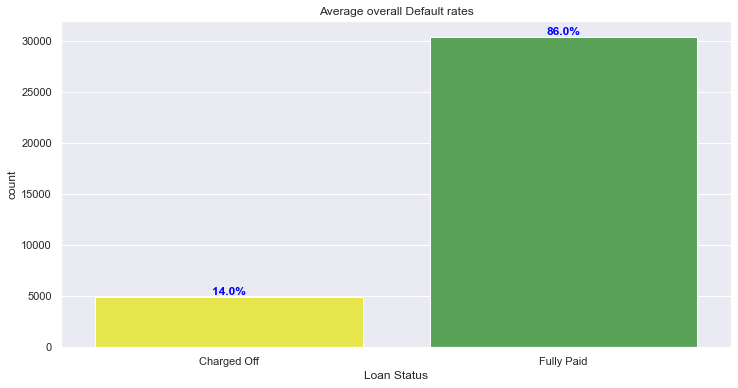

In [111]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,6))
ls = sns.countplot(x="loan_status", data=loan,hue=None,palette="Set1_r")
plt.title("Average overall Default rates")
plt.xlabel("Loan Status")
showLabels(ls)
plt.show()

<font color="maroon">**Observations:**
**86%** of borrowers has paid the loan fully where as **14%** are **defaulted** the loan.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Loan issue date (issue_d): The month which the loan was funded.

In [112]:
#Let's check loan issue data on yearly and monthly basis.
print("Monthly based count:\n")
print(loan.issue_d_month.value_counts())
print("\nYearly based count:\n")
print(loan.issue_d_year.value_counts())

Monthly based count:

Dec    3820
Nov    3678
Oct    3436
Sep    3276
Aug    3188
Jul    3115
Jun    2977
May    2745
Apr    2669
Mar    2395
Jan    2048
Feb    2020
Name: issue_d_month, dtype: int64

Yearly based count:

2011    19090
2010    10795
2009     4423
2008     1053
2007        6
Name: issue_d_year, dtype: int64


In [113]:
#Let's check loan issue data on yearly and monthly basis.
print("Monthly based describe:\n")
print(loan.issue_d_month.describe())
print("\nYearly based describe:\n")
print(loan.issue_d_year.describe())

Monthly based describe:

count     35367
unique       12
top         Dec
freq       3820
Name: issue_d_month, dtype: object

Yearly based describe:

count   35367.00
mean     2010.35
std         0.81
min      2007.00
25%      2010.00
50%      2011.00
75%      2011.00
max      2011.00
Name: issue_d_year, dtype: float64


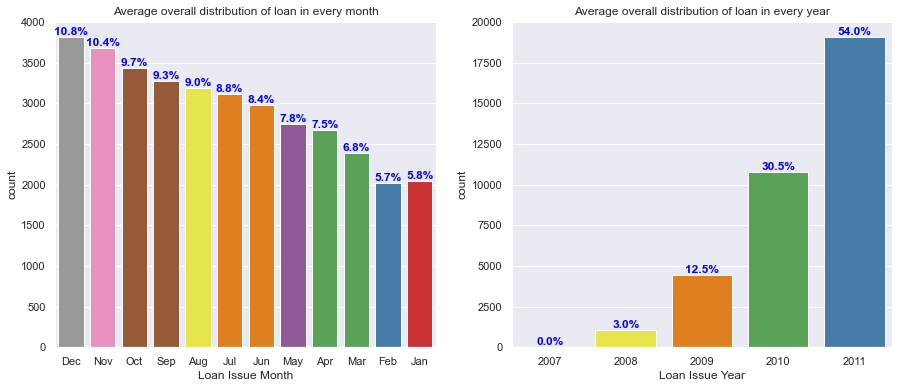

In [114]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ism = sns.countplot(x=loan.issue_d_month, data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan in every month")
plt.xlabel("Loan Issue Month")
showLabels(ism)
plt.subplot(1,2,2)
isy = sns.countplot(x=loan.issue_d_year, data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan in every year")
plt.xlabel("Loan Issue Year")
showLabels(isy)
plt.show()

<font color="maroon">**Observations:**
- Number of loan applicants is increasing every year<br>
- Number of loan applicants increases towards the end of the year i.e. Oct, Nov, Dec.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Purpose (purpose): A category provided by the borrower for the loan request. 


In [115]:
loan.purpose.value_counts()

debt_consolidation    16911
credit_card            4626
other                  3462
home_improvement       2614
major_purchase         1973
car                    1395
small_business         1351
wedding                 865
medical                 622
moving                  523
vacation                332
house                   330
educational             276
renewable_energy         87
Name: purpose, dtype: int64

In [116]:
loan.purpose.describe()

count                  35367
unique                    14
top       debt_consolidation
freq                   16911
Name: purpose, dtype: object

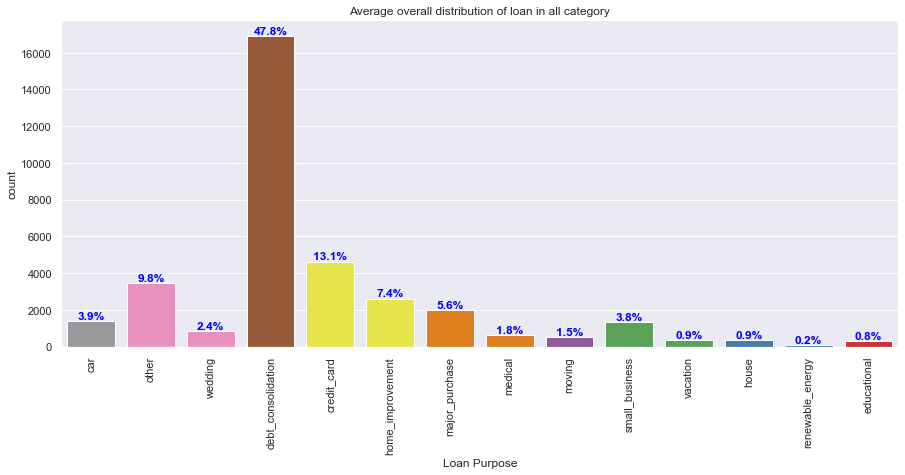

In [117]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
lp = sns.countplot(x=loan.purpose, data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan in all category")
plt.xlabel("Loan Purpose")
showRotateLabels(lp)
plt.show()

<font color="maroon">**Observations:**
- **debt_consolidation** is by far the largest 'purpose' for seeking a loan<br>
- About 47.8% and 13.1% of the loans are issed for the purpose of **debt_consolidation** and **credit_card**<br>
- Very few people are inclined towards **renewable energy**</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Interest Rate (int_rate): Interest Rate on the loan.

In [118]:
loan.int_rate.value_counts()

10.99    862
11.49    735
7.51     731
13.49    709
7.88     674
        ... 
13.84      1
21.48      1
16.01      1
9.83       1
12.36      1
Name: int_rate, Length: 334, dtype: int64

In [119]:
loan.int_rate.describe()

count   35367.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

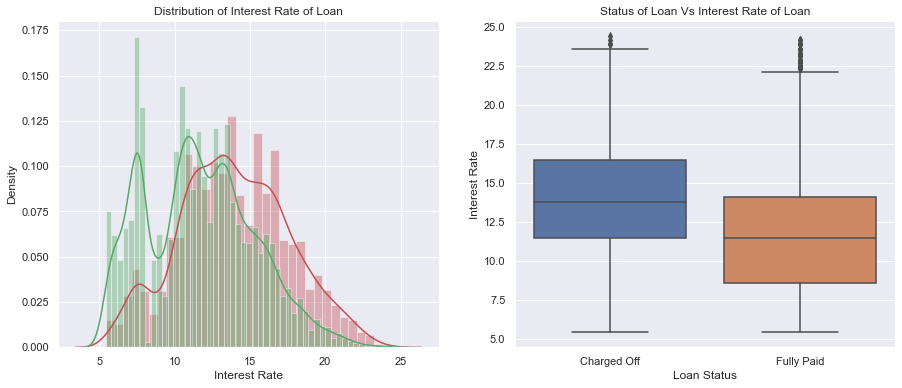

In [120]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
plt.subplot(1, 2, 1)
sns.distplot(loan[loan.loan_status.isin(['Charged Off'])].int_rate , color="r")
sns.distplot(loan[loan.loan_status.isin(['Fully Paid'])].int_rate , color="g")
plt.title("Distribution of Interest Rate of Loan")
plt.xlabel("Interest Rate")
plt.subplot(1, 2, 2)
sns.boxplot(x=loan.loan_status, y=loan.int_rate, data=loan)
plt.title("Status of Loan Vs Interest Rate of Loan")
plt.ylabel("Interest Rate")
plt.xlabel("Loan Status")
plt.show()

In [121]:
loan.groupby('loan_status')['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4943.00,13.93,3.65,5.42,11.49,13.79,16.45,24.40
Fully Paid,30424.00,11.67,3.61,5.42,8.59,11.49,14.09,24.11


<font color="maroon">**Observations:**
- Based on above both the plot it seems that rate of interest lies between **5%** to **24.5%** for both fully paid and charged off customers.
- Seeing above data, most of the **Charged-off** ranges between **11%** to **17%**. Which is on higher side of overall interest rate.
- We can assume that higher the interest rate of loan chance of defaulter may increase.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Grade of Loan (grade): Lending Club assigned loan grade

In [122]:
loan.grade.value_counts()

B    10718
A     9140
C     7181
D     4663
E     2481
F      902
G      282
Name: grade, dtype: int64

In [123]:
loan.grade.describe()

count     35367
unique        7
top           B
freq      10718
Name: grade, dtype: object

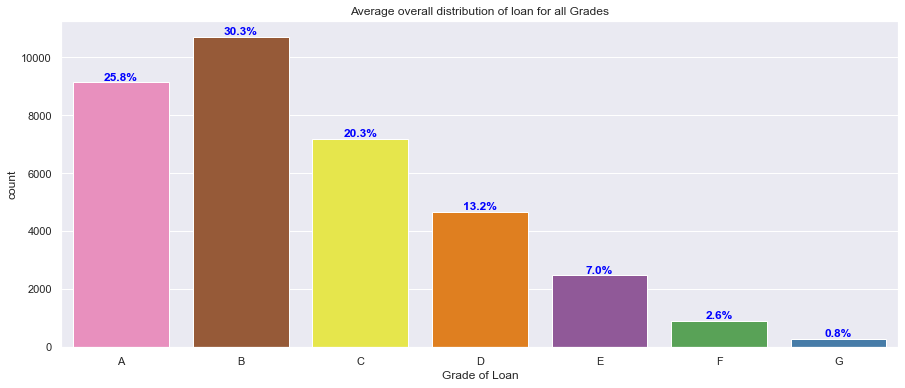

In [124]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
grd = sns.countplot(x=loan.grade.sort_values(), data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan for all Grades")
plt.xlabel("Grade of Loan")
showLabels(grd)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **25.8%** Grade A and **30.3%** Grade B loan's are higher approval. So Grade A and B loans are safe.
- Grade D, E, F, G loans are less safe because percentage of loan approved is less.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Sub-Grade of Loan (sub-grade): Lending Club assigned loan sub-grade

In [125]:
#Let's check Grade loan on more deeper level and understand which sub-grade loan is approved and rejected
loan.sub_grade.value_counts()

A4    2662
B3    2589
A5    2487
B5    2444
B4    2247
C1    1874
B2    1825
C2    1791
A3    1630
B1    1613
C3    1369
A2    1356
D2    1184
C4    1095
C5    1052
D3    1022
A1    1005
D4     848
D1     846
D5     763
E1     691
E2     566
E3     482
E4     394
E5     348
F1     293
F2     214
F3     160
F4     136
F5      99
G1      88
G2      74
G4      54
G3      41
G5      25
Name: sub_grade, dtype: int64

In [126]:
loan.sub_grade.describe()

count     35367
unique       35
top          A4
freq       2662
Name: sub_grade, dtype: object

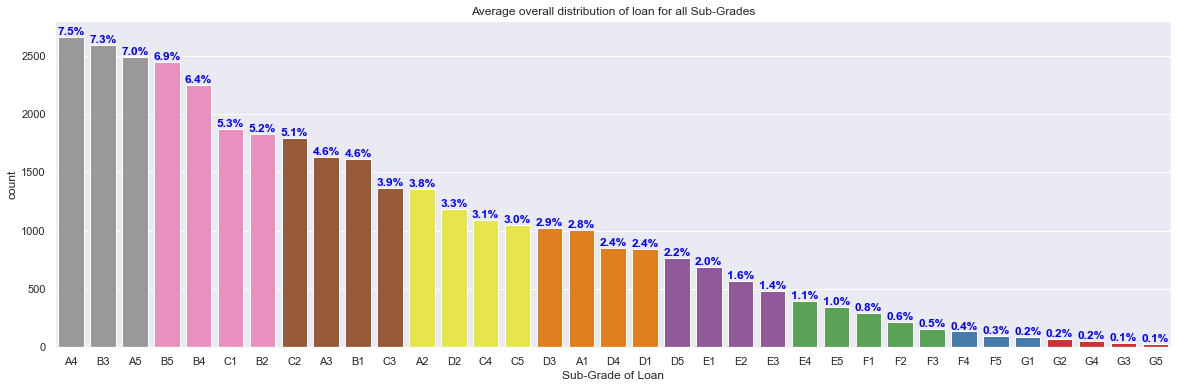

In [127]:
sns.set(style="darkgrid")
plt.figure(figsize=(20,6))
subgrd = sns.countplot(x=loan.sub_grade, data=loan,order=loan.sub_grade.value_counts().index,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan for all Sub-Grades")
plt.xlabel("Sub-Grade of Loan")
showLabels(subgrd)
plt.show()

<font color="maroon">**Observations:**
- Above shows that from **25.8%** of Grade A loan sub-grade **A4 (7.5%)** and **A5 (7.0%)** loan are having higher approval rate.
- From **30.3%** of Grade B loan sub-grade **B3 (7.3%)** and **B5(6.9%)** loan are higher approval rate.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Employee Experience (emp_length): Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.

In [128]:
loan.emp_length.value_counts()

10+ years    8028
2 years      4083
< 1 year     3978
3 years      3833
4 years      3206
5 years      3043
1 year       2959
6 years      2062
7 years      1638
8 years      1361
9 years      1176
Name: emp_length, dtype: int64

In [129]:
loan.emp_length.describe()

count         35367
unique           11
top       10+ years
freq           8028
Name: emp_length, dtype: object

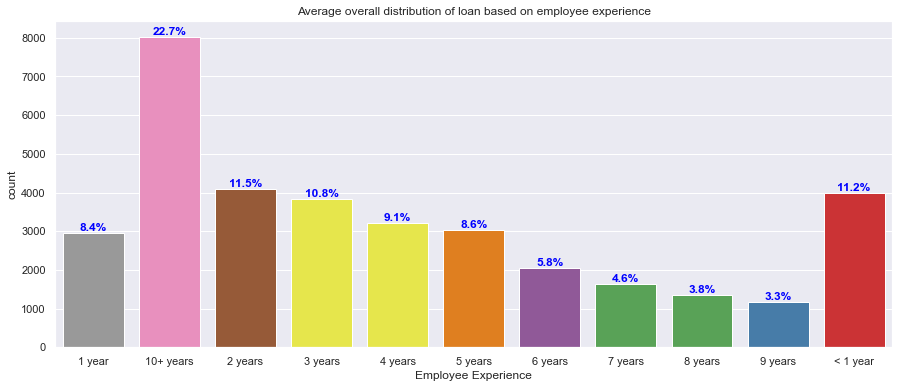

In [130]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
emp_exp = sns.countplot(x=loan.emp_length.sort_values(), data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan based on employee experience")
plt.xlabel("Employee Experience")
showLabels(emp_exp)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **22.7%** have 10+ experience is applying for more loan.
- Around **11.5%** of people is having experience 2 or less than that is applying for loan.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Home Ownership (home_ownership): The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

In [131]:
#let' check the count for which the loan is registered by borrower.
loan.home_ownership.value_counts()

RENT        17065
MORTGAGE    15703
OWN          2505
OTHER          94
Name: home_ownership, dtype: int64

In [132]:
loan.home_ownership.describe()

count     35367
unique        4
top        RENT
freq      17065
Name: home_ownership, dtype: object

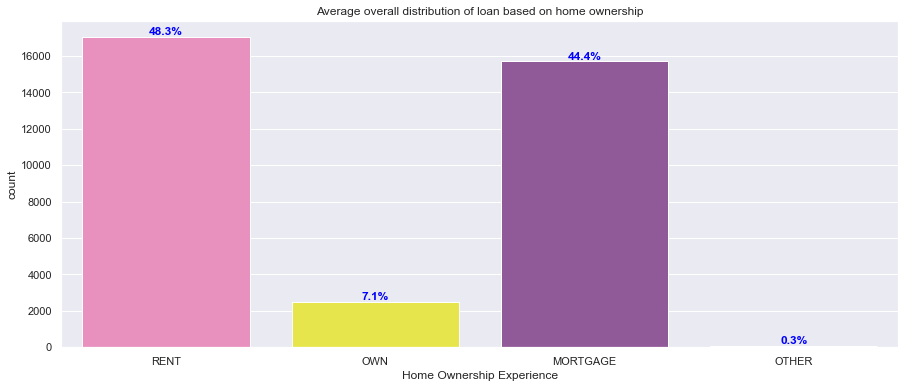

In [133]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
home_own = sns.countplot(x=loan.home_ownership, data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan based on home ownership")
plt.xlabel("Home Ownership Experience")
showLabels(home_own)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **48.3%** of loan is registered as **RENT**.
- **44.4%** of loan is registered as **MORTGAGE**</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Verification Status (verification_status): Indicates if income was verified by LC, not verified, or if the income source was verified.

In [134]:
loan.verification_status.value_counts()

Not Verified       14840
Verified           11363
Source Verified     9164
Name: verification_status, dtype: int64

In [135]:
loan.verification_status.describe()

count            35367
unique               3
top       Not Verified
freq             14840
Name: verification_status, dtype: object

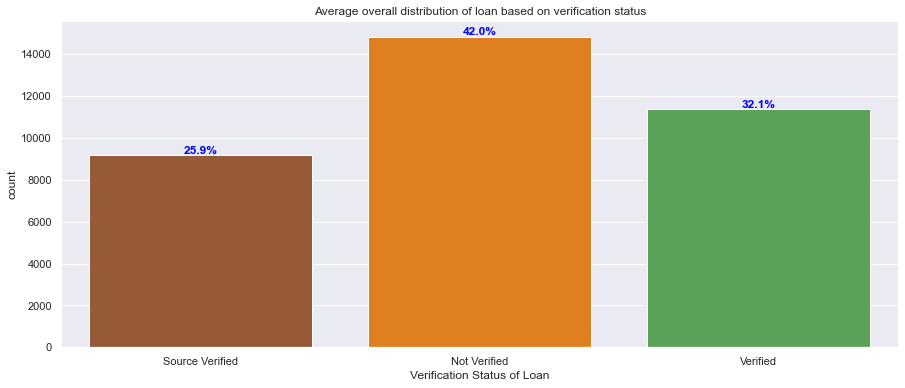

In [136]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
vr = sns.countplot(x=loan.verification_status, data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan based on verification status")
plt.xlabel("Verification Status of Loan")
showLabels(vr)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **42.0%** of loan given without verifying applicants income.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Borrower's State (addr_state): The state provided by the borrower in the loan application.

In [137]:
loan.addr_state.sort_values().value_counts()

CA    6396
NY    3386
FL    2535
TX    2453
NJ    1667
IL    1381
PA    1373
VA    1260
GA    1253
MA    1181
OH    1096
MD     950
AZ     758
WA     720
CO     682
NC     672
CT     654
MI     641
MO     609
MN     554
NV     442
SC     422
AL     397
OR     397
LA     389
WI     387
KY     293
OK     272
KS     233
UT     229
AR     216
DC     203
RI     185
NM     163
WV     157
HI     153
NH     148
DE     105
WY      75
AK      73
MT      71
SD      55
VT      47
MS      18
TN      10
ID       3
IN       1
NE       1
IA       1
Name: addr_state, dtype: int64

In [138]:
loan.addr_state.describe()

count     35367
unique       49
top          CA
freq       6396
Name: addr_state, dtype: object

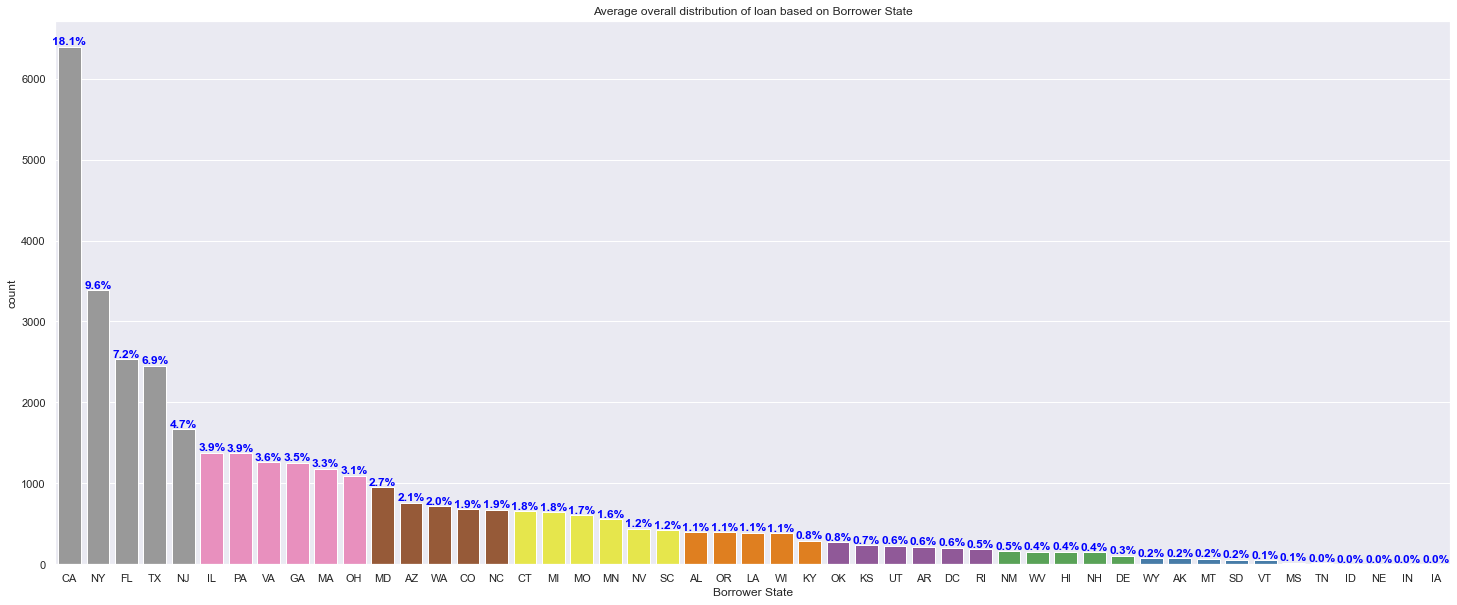

In [139]:
sns.set(style="darkgrid")
plt.figure(figsize=(25,10))
ads = sns.countplot(x=loan.addr_state, data=loan,order=loan.addr_state.value_counts().index,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan based on Borrower State")
plt.xlabel("Borrower State")
showLabels(ads)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **18.1%** of loan is taken in Canada  (CA).
- **9.6%** of loan is taken in New York (NY)
- So major loan registered from CA and NY only.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Derogatory Public Records (pub_rec): Number of derogatory public records.

In [140]:
loan.pub_rec.sort_values().value_counts()

0    33516
1     1798
2       44
3        7
4        2
Name: pub_rec, dtype: int64

In [141]:
loan.pub_rec.describe()

count   35367.00
mean        0.05
std         0.24
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         4.00
Name: pub_rec, dtype: float64

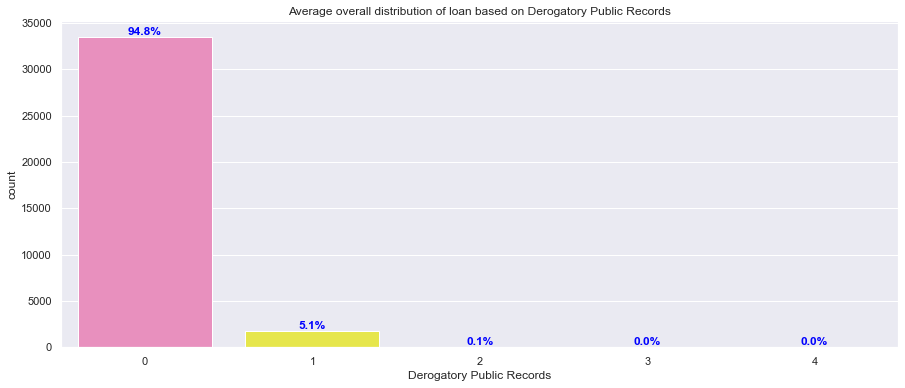

In [142]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
pub = sns.countplot(x=loan.pub_rec, data=loan,order=loan.pub_rec.value_counts().index,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan based on Derogatory Public Records")
plt.xlabel("Derogatory Public Records")
showLabels(pub)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **94.8%** of loan not having any derogatory records while **5.1%** is still present.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Bankruptcy Public Records (pub_rec_bankruptcies): Number of public record bankruptcies.

In [143]:
loan.pub_rec_bankruptcies.sort_values().value_counts()

0.00    33898
1.00     1464
2.00        5
Name: pub_rec_bankruptcies, dtype: int64

In [144]:
loan.pub_rec_bankruptcies.describe()

count   35367.00
mean        0.04
std         0.20
min         0.00
25%         0.00
50%         0.00
75%         0.00
max         2.00
Name: pub_rec_bankruptcies, dtype: float64

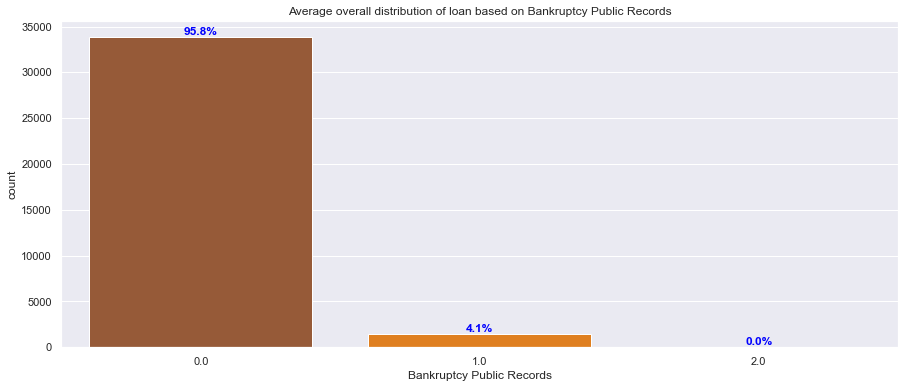

In [145]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
brt = sns.countplot(x=loan.pub_rec_bankruptcies, data=loan,order=loan.pub_rec_bankruptcies.value_counts().index,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan based on Bankruptcy Public Records")
plt.xlabel("Bankruptcy Public Records")
showLabels(brt)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **95.8%** people not went bankrupt and only **4.1%** went bankrupt.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Loan payment tenure (term): The number of payments on the loan. Values are in months and can be either 36 or 60.

In [146]:
loan.term.sort_values().value_counts()

36 months    26377
60 months     8990
Name: term, dtype: int64

In [147]:
loan.term.describe()

count         35367
unique            2
top       36 months
freq          26377
Name: term, dtype: object

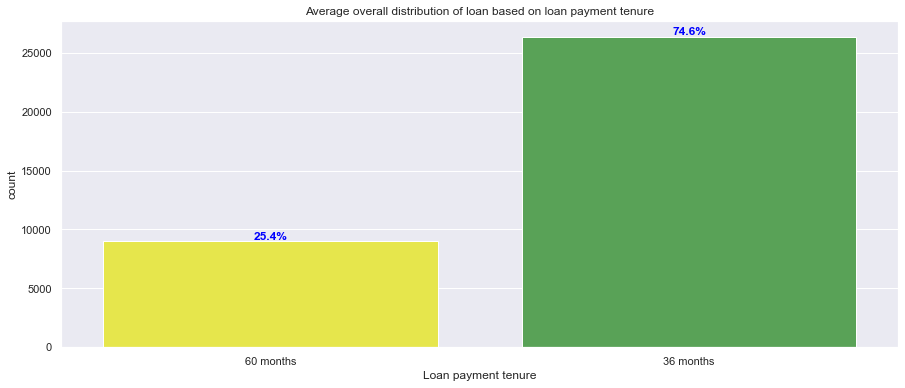

In [148]:
sns.set(style="darkgrid")
plt.figure(figsize=(15,6))
trm= sns.countplot(x=loan.term, data=loan,hue=None,palette="Set1_r")
plt.title("Average overall distribution of loan based on loan payment tenure")
plt.xlabel("Loan payment tenure")
showLabels(trm)
plt.show()

<font color="maroon">**Observations:**
- Above shows that **74.6%** of borrower taken **36 months** tenure than **60 months**.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = green>Segmented Univariate Analysis</font>

## 1. Loan Amount

In [149]:
loan.grade.unique()

array(['C', 'A', 'E', 'B', 'D', 'F', 'G'], dtype=object)

In [150]:
loan.loan_amnt.describe()

count   35367.00
mean    11133.07
std      7326.23
min       500.00
25%      5500.00
50%     10000.00
75%     15000.00
max     35000.00
Name: loan_amnt, dtype: float64

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Terms vs Loan Amount</font>

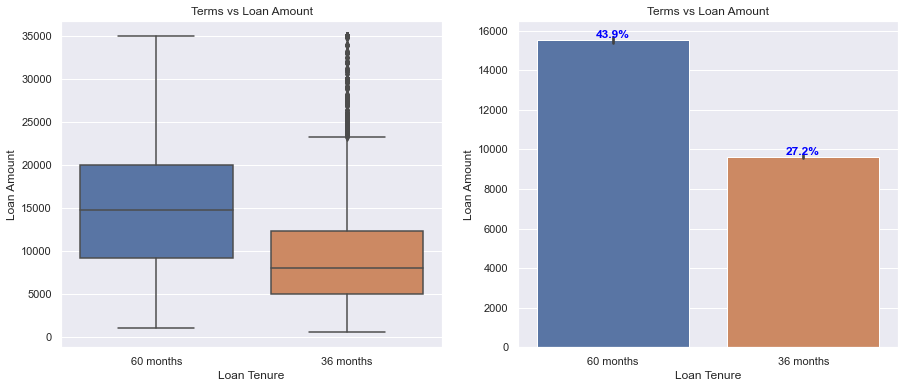

In [151]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)
plt.xlabel("Loan Tenure")
plt.title('Terms vs Loan Amount')
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
ax = sns.barplot(x='term', y=loan.loan_amnt, data=loan)
plt.xlabel("Loan Tenure")
plt.title('Terms vs Loan Amount')
plt.ylabel('Loan Amount')
showLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Higher amount loans have high tenure i.e, 60 months.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Grade vs Loan Amount</font>

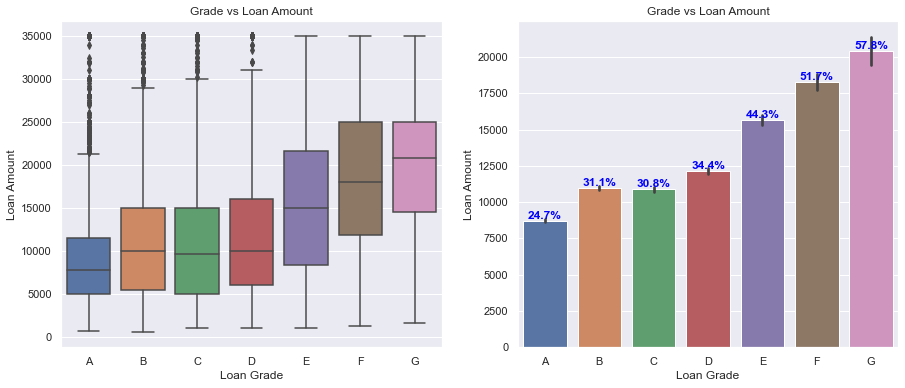

In [152]:
plt.figure(figsize=(15,6))
#Finding grades with sorted alphabetical order
grade_lst = loan.grade.unique()
grade_lst.sort()
plt.subplot(1,2,1)
ax = sns.boxplot(x='grade', y=loan.loan_amnt, order = grade_lst, data=loan)
plt.xlabel("Loan Grade")
plt.title('Grade vs Loan Amount')
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
ax = sns.barplot(x='grade', y=loan.loan_amnt, order = grade_lst, data=loan)
plt.xlabel("Loan Grade")
plt.title('Grade vs Loan Amount')
plt.ylabel('Loan Amount')
showLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Grade 'G' and 'F' have taken max loan amount. As Grades are increasing the loan amount is increasing.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Verification Status vs Loan Amount</font>

In [153]:
loan.verification_status.describe()

count            35367
unique               3
top       Not Verified
freq             14840
Name: verification_status, dtype: object

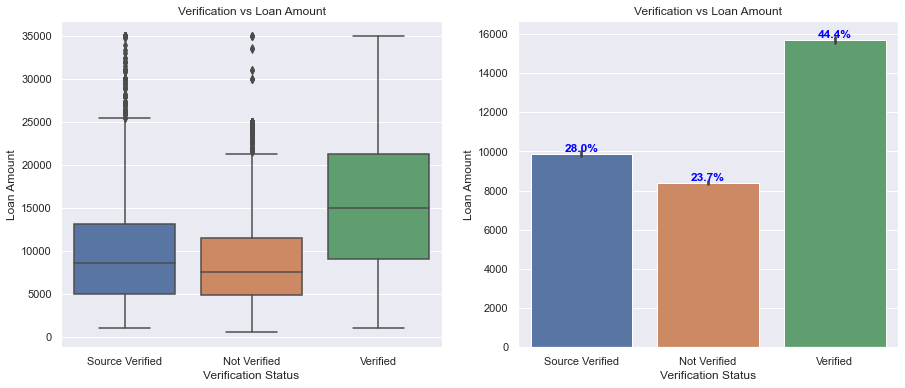

In [154]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.verification_status, y=loan.loan_amnt, data=loan)
plt.xlabel("Verification Status")
plt.title('Verification vs Loan Amount')
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.verification_status, y=loan.loan_amnt, data=loan)
plt.xlabel("Verification Status")
plt.title('Verification vs Loan Amount')
plt.ylabel('Loan Amount')
showLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- **44.4%** loan amount is **verified**.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Home Ownership vs Loan Amount</font>

In [155]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [156]:
loan.groupby(loan.home_ownership)['loan_amnt'].median()

home_ownership
MORTGAGE    10500
OTHER       10000
OWN          8500
RENT         8400
Name: loan_amnt, dtype: int64

In [157]:
loan[loan.home_ownership == 'MORTGAGE']['loan_amnt'].describe()

count   15703.00
mean    12518.16
std      7876.38
min       500.00
25%      6000.00
50%     10500.00
75%     16800.00
max     35000.00
Name: loan_amnt, dtype: float64

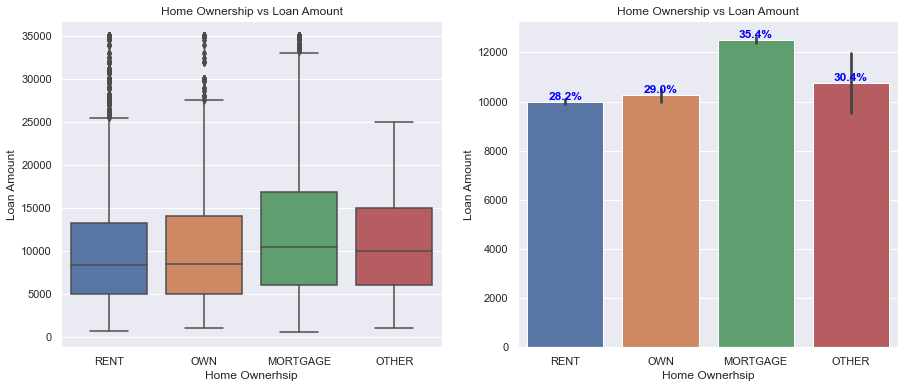

In [158]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.home_ownership, y=loan.loan_amnt, data=loan)
plt.xlabel("Home Ownerhsip")
plt.title('Home Ownership vs Loan Amount')
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.home_ownership, y=loan.loan_amnt, data=loan)
plt.xlabel("Home Ownerhsip")
plt.title('Home Ownership vs Loan Amount')
plt.ylabel('Loan Amount')
showLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above plot, **35.4%** borrower are from **MORTGAGE**.
- Average loan amount **10500** high for MORTGAGE owned borrowers as compared to others.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Loan Status vs Loan Amount</font>

In [159]:
loan.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [160]:
loan.groupby(loan.loan_status)['loan_amnt'].median()

loan_status
Charged Off    10000
Fully Paid      9600
Name: loan_amnt, dtype: int64

In [161]:
loan[loan.loan_status == 'Charged Off']['loan_amnt'].describe()

count    4943.00
mean    12286.15
std      8064.26
min      1000.00
25%      6000.00
50%     10000.00
75%     17000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [162]:
loan.loan_status.describe()

count          35367
unique             2
top       Fully Paid
freq           30424
Name: loan_status, dtype: object

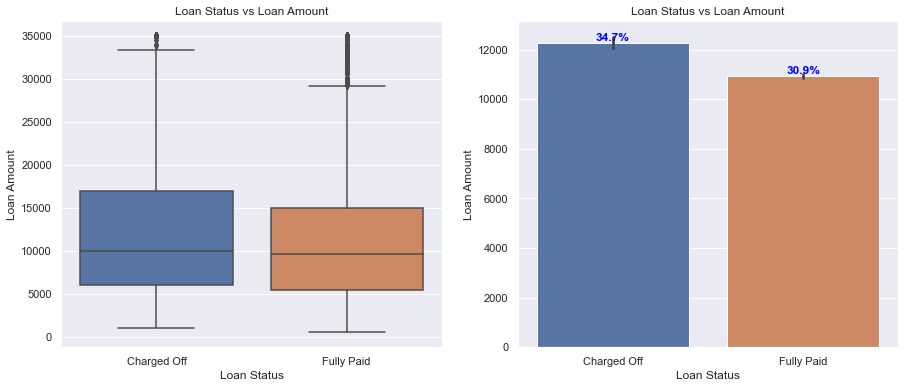

In [163]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.loan_status, y=loan.loan_amnt, data=loan)
plt.xlabel("Loan Status")
plt.title('Loan Status vs Loan Amount')
plt.ylabel('Loan Amount')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.loan_status, y=loan.loan_amnt, data=loan)
plt.xlabel("Loan Status")
plt.title('Loan Status vs Loan Amount')
plt.ylabel('Loan Amount')
showLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- **"Charged Off**" is more as compare to **"Fully Paid"** loan.
- Around **34.7%** are **"Charged Off**" loan as compared to **"Fully Paid**".</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Purpose vs Loan Amount</font>

In [164]:
loan.purpose.unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [165]:
loan.groupby(loan.purpose)['loan_amnt'].median()

purpose
car                    6000
credit_card           10000
debt_consolidation    11200
educational            5500
home_improvement       9600
house                 10100
major_purchase         6000
medical                6000
moving                 5000
other                  6000
renewable_energy       6000
small_business        11525
vacation               5000
wedding                8000
Name: loan_amnt, dtype: int64

In [166]:
loan.purpose.describe()

count                  35367
unique                    14
top       debt_consolidation
freq                   16911
Name: purpose, dtype: object

In [167]:
loan[loan.purpose == 'debt_consolidation']['loan_amnt'].describe()

count   16911.00
mean    12605.85
std      7357.55
min      1000.00
25%      7000.00
50%     11200.00
75%     16475.00
max     35000.00
Name: loan_amnt, dtype: float64

In [168]:
loan[loan.purpose == 'small_business']['loan_amnt'].describe()

count    1351.00
mean    13366.84
std      8464.92
min      1000.00
25%      6500.00
50%     11525.00
75%     20000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [169]:
loan[loan.purpose == 'house']['loan_amnt'].describe()

count     330.00
mean    12871.44
std      8185.03
min      1200.00
25%      6062.50
50%     10100.00
75%     16000.00
max     35000.00
Name: loan_amnt, dtype: float64

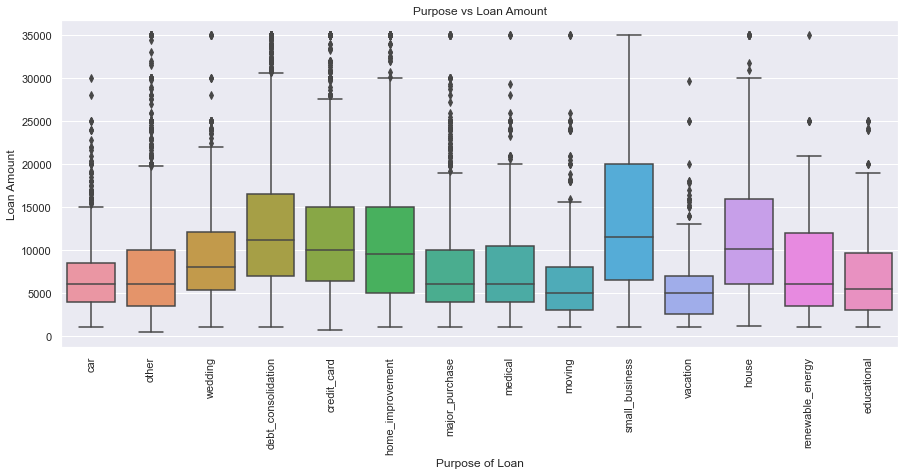

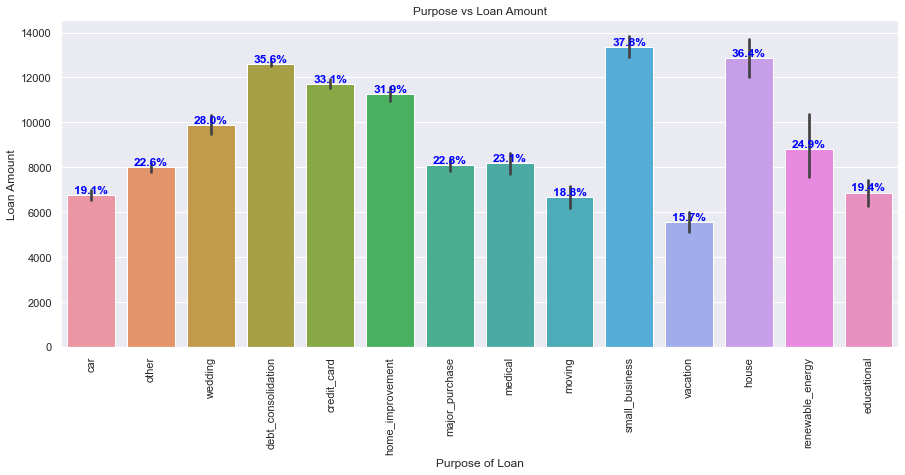

In [170]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=loan.purpose, y=loan.loan_amnt, data=loan)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.xlabel("Purpose of Loan")
plt.title('Purpose vs Loan Amount')
plt.ylabel('Loan Amount')
plt.show()
plt.figure(figsize=(15,6))
ax = sns.barplot(x=loan.purpose, y=loan.loan_amnt, data=loan)
plt.xlabel("Purpose of Loan")
plt.title('Purpose vs Loan Amount')
plt.ylabel('Loan Amount')
showRotateLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, maximum loan amount (around **37.8%**) is taken by **Small bussiness** followed by **House** (around **36.4**)</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Employee Experience vs Loan Amount</font>

In [171]:
loan.emp_length.unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [172]:
loan.groupby(loan.emp_length)['loan_amnt'].median()

emp_length
1 year        8400
10+ years    11000
2 years       8400
3 years       9250
4 years       9725
5 years      10000
6 years      10000
7 years      10000
8 years      10000
9 years      10200
< 1 year      8000
Name: loan_amnt, dtype: int64

In [173]:
loan.emp_length.describe()

count         35367
unique           11
top       10+ years
freq           8028
Name: emp_length, dtype: object

In [174]:
loan[loan.emp_length == '10+ years']['loan_amnt'].describe()

count    8028.00
mean    12772.64
std      8065.93
min      1000.00
25%      6000.00
50%     11000.00
75%     18000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [175]:
loan[loan.emp_length == '1 year']['loan_amnt'].describe()

count    2959.00
mean    10104.50
std      6727.55
min       725.00
25%      5000.00
50%      8400.00
75%     14000.00
max     35000.00
Name: loan_amnt, dtype: float64

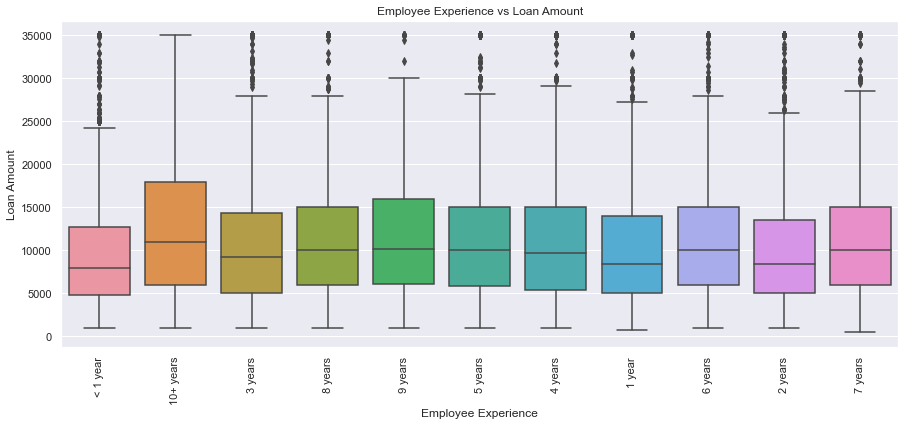

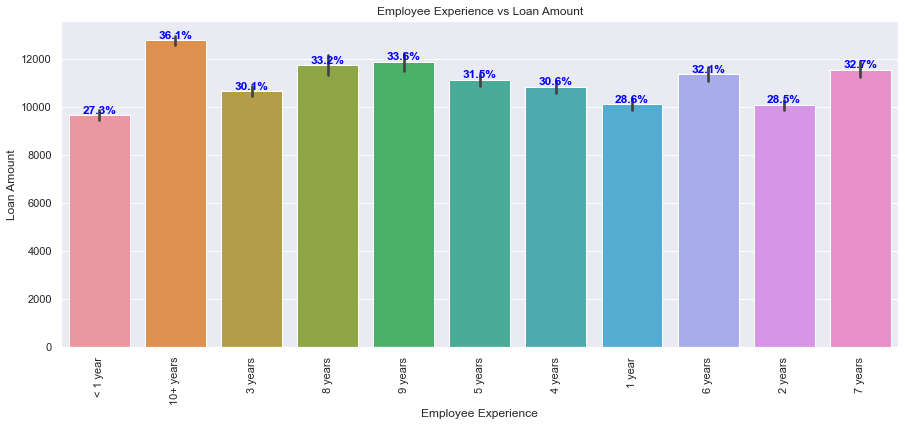

In [176]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=loan.emp_length, y=loan.loan_amnt, data=loan)
#Rotating x values 90 for better visibility
plt.xticks(rotation=90)
plt.xlabel("Employee Experience")
plt.title('Employee Experience vs Loan Amount')
plt.ylabel('Loan Amount')
plt.show()
plt.figure(figsize=(15,6))
ax = sns.barplot(x=loan.emp_length, y=loan.loan_amnt, data=loan)
plt.xlabel("Employee Experience")
plt.title('Employee Experience vs Loan Amount')
plt.ylabel('Loan Amount')
showRotateLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, around **36.1%** having **"10+ years"** of experience taken **more** loan amount
- Around **27.3%** having **"< 1 years"** of experience taken **less** loan amount</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Issue Date(By Month & Year) vs Loan Amount</font>

In [177]:
loan.issue_d_month.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [178]:
loan.issue_d_year.unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [179]:
loan.groupby(loan.issue_d_month)['loan_amnt'].median()

issue_d_month
Apr    9450.00
Aug    9087.50
Dec   10000.00
Feb   10000.00
Jan   10000.00
Jul    8450.00
Jun    8500.00
Mar    9600.00
May    9000.00
Nov   10000.00
Oct   10000.00
Sep    9862.50
Name: loan_amnt, dtype: float64

In [180]:
loan.groupby(loan.issue_d_year)['loan_amnt'].median()

issue_d_year
2007    10500
2008     7500
2009     9000
2010     9800
2011    10000
Name: loan_amnt, dtype: int64

In [181]:
loan.issue_d_month.describe()

count     35367
unique       12
top         Dec
freq       3820
Name: issue_d_month, dtype: object

In [182]:
loan.issue_d_year.describe()

count   35367.00
mean     2010.35
std         0.81
min      2007.00
25%      2010.00
50%      2011.00
75%      2011.00
max      2011.00
Name: issue_d_year, dtype: float64

In [183]:
loan[loan.issue_d_month == 'Dec']['loan_amnt'].describe()

count    3820.00
mean    12130.34
std      7396.79
min      1000.00
25%      6000.00
50%     10000.00
75%     16000.00
max     35000.00
Name: loan_amnt, dtype: float64

In [184]:
loan[loan.issue_d_year == '2007']['loan_amnt']

Series([], Name: loan_amnt, dtype: int64)

#### Issue Date By Month

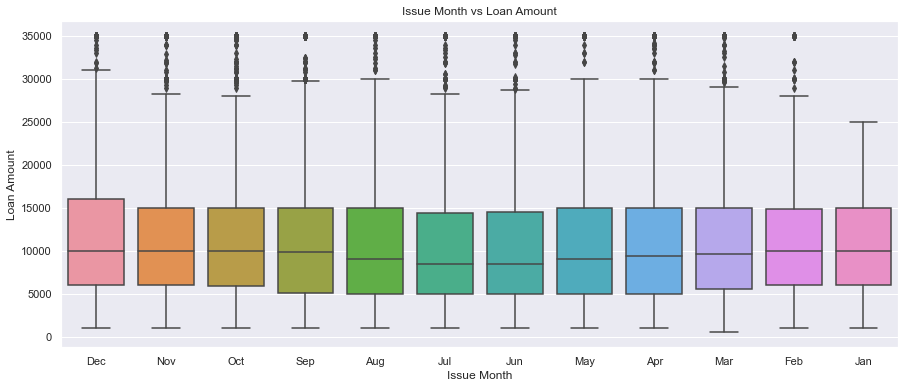

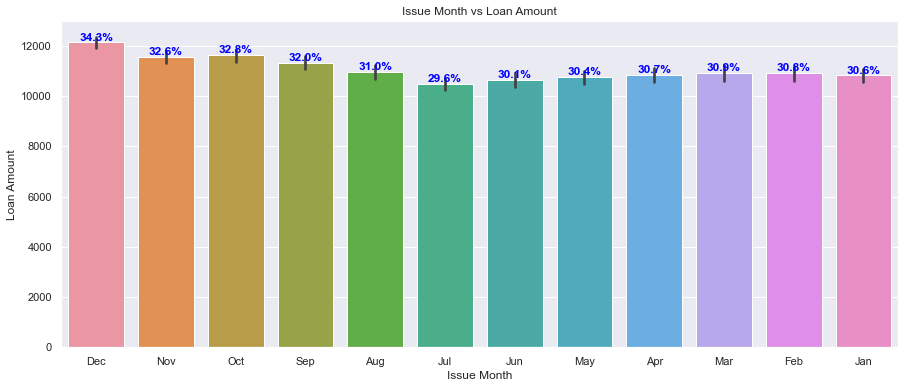

In [185]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=loan.issue_d_month, y=loan.loan_amnt, data=loan)
plt.xlabel("Issue Month")
plt.title('Issue Month vs Loan Amount')
plt.ylabel('Loan Amount')
plt.show()
plt.figure(figsize=(15,6))
ax = sns.barplot(x=loan.issue_d_month, y=loan.loan_amnt, data=loan)
plt.xlabel("Issue Month")
plt.title('Issue Month vs Loan Amount')
plt.ylabel('Loan Amount')
showLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, around **34.3%** of borrower took loan towards the end of year i.e. they took higher amount loan in Oct, Nov and Dec.</font>

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Issue Date By Year

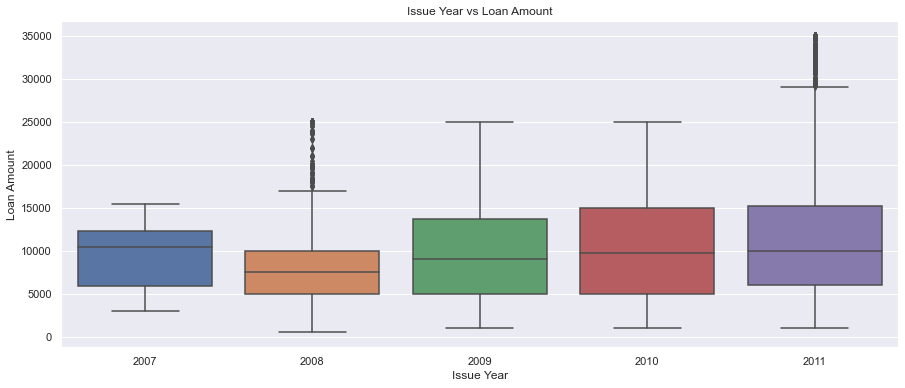

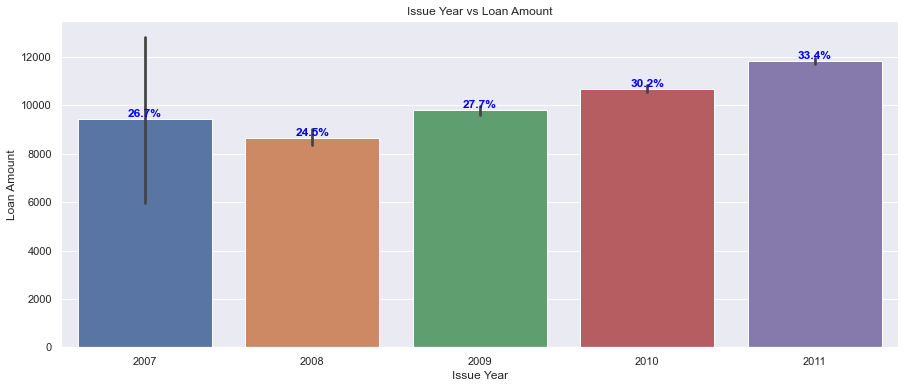

In [186]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=loan.issue_d_year, y=loan.loan_amnt, data=loan)
plt.xlabel("Issue Year")
plt.title('Issue Year vs Loan Amount')
plt.ylabel('Loan Amount')
plt.show()
plt.figure(figsize=(15,6))
ax = sns.barplot(x=loan.issue_d_year, y=loan.loan_amnt, data=loan)
plt.xlabel("Issue Year")
plt.title('Issue Year vs Loan Amount')
plt.ylabel('Loan Amount')
showLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, around **33.4%** of borrower took higher loan amount in 2011 and **30.2%** in 2010.
- Loan amount distribution is more as the years increases, which means people have taken different loan amounts in each year.
- Few Loan borrowers took higher loan amount in 2007 and 2011 which are plotted as an ouliers.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 2. Interest Rate

In [187]:
loan.int_rate.unique()

array([15.27, 13.49,  7.9 , 15.96, 18.64, 12.69, 14.65,  9.91, 10.65,
       16.29,  6.03, 11.71, 12.42, 16.77,  8.9 ,  7.51,  6.62, 19.91,
       17.27, 14.27, 21.28, 17.58, 21.67, 19.42, 20.89, 18.25, 20.3 ,
       23.91, 19.03, 23.13, 22.74, 22.35, 22.06, 24.11,  6.  , 23.52,
       22.11,  7.49, 11.99,  5.99, 10.99,  9.99, 18.79, 11.49, 15.99,
       16.49,  6.99, 12.99, 15.23, 14.79,  8.49,  5.42, 17.49, 10.59,
       15.62, 19.29, 13.99, 18.39, 16.89, 17.99, 20.99, 22.85, 19.69,
       20.62, 20.25, 21.36, 23.22, 21.74, 22.48, 23.59, 12.62, 18.07,
       11.63,  7.91,  7.42, 11.14, 20.2 , 12.12, 19.39, 16.11, 17.54,
       16.59, 17.19, 12.87, 20.69,  9.67, 21.82, 19.79, 18.49, 13.84,
       22.94, 24.4 , 21.48, 14.82, 17.88, 20.11, 16.02, 13.06, 15.28,
       17.14, 13.43, 11.11, 10.37, 14.17, 16.4 , 15.65, 17.51,  7.66,
       10.74,  7.29,  5.79,  6.92, 10.  ,  9.63, 14.54, 12.68, 18.62,
       19.36, 13.8 , 14.91, 18.99, 21.59, 20.85, 21.22, 19.74, 20.48,
        6.91, 12.23,

In [188]:
loan.int_rate.describe()

count   35367.00
mean       11.98
std         3.70
min         5.42
25%         8.94
50%        11.83
75%        14.46
max        24.40
Name: int_rate, dtype: float64

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Terms vs Interest Rate</font>

In [189]:
loan.groupby(loan.term)['int_rate'].median()

term
36 months   10.99
60 months   14.91
Name: int_rate, dtype: float64

In [190]:
loan.term.describe()

count         35367
unique            2
top       36 months
freq          26377
Name: term, dtype: object

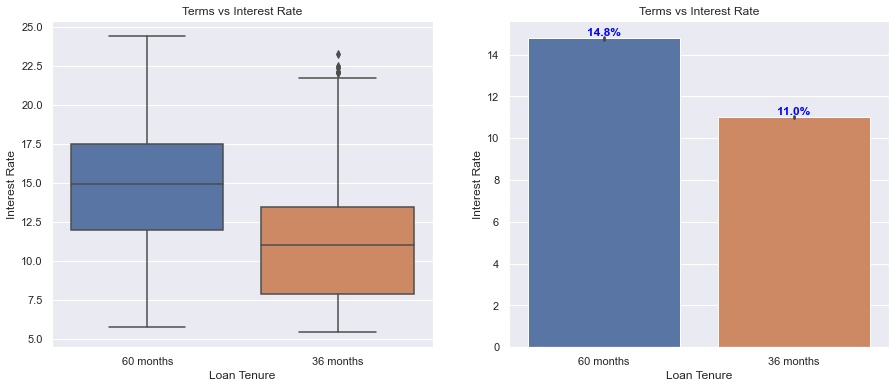

In [191]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(x='term', y=loan.int_rate, data=loan)
plt.xlabel("Loan Tenure")
plt.title('Terms vs Interest Rate')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
ax = sns.barplot(x='term', y=loan.int_rate, data=loan)
plt.xlabel("Loan Tenure")
plt.title('Terms vs Interest Rate')
plt.ylabel('Interest Rate')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Higher interest rate have high tenure i.e, 60 months.
- Around **14.8%** borrower took loan for **60 months** when interest rates are high.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Grade vs Interest Rate</font>

In [192]:
loan.groupby(loan.grade)['int_rate'].median()

grade
A    7.49
B   10.99
C   13.49
D   15.62
E   17.51
F   19.41
G   20.90
Name: int_rate, dtype: float64

In [193]:
loan.grade.describe()

count     35367
unique        7
top           B
freq      10718
Name: grade, dtype: object

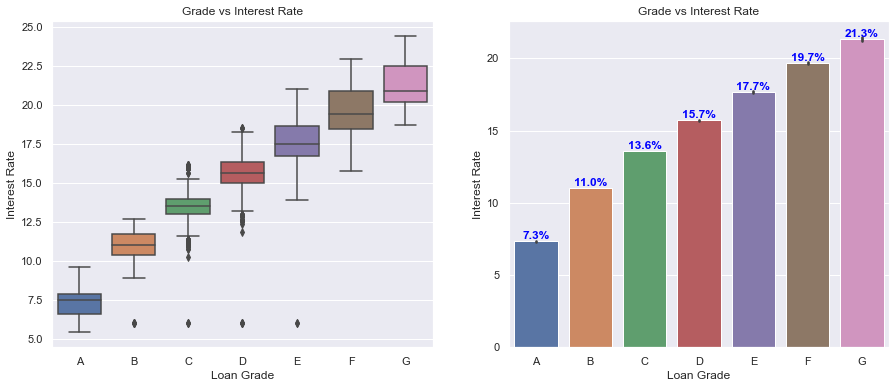

In [194]:
plt.figure(figsize=(15,6))
#Finding grades with sorted alphabetical order
grade_lst = loan.grade.unique()
grade_lst.sort()
plt.subplot(1,2,1)
ax = sns.boxplot(x='grade', y=loan.int_rate, order = grade_lst, data=loan)
plt.xlabel("Loan Grade")
plt.title('Grade vs Interest Rate')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
ax = sns.barplot(x='grade', y=loan.int_rate, order = grade_lst, data=loan)
plt.xlabel("Loan Grade")
plt.title('Grade vs Interest Rate')
plt.ylabel('Interest Rate')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Grade 'G' and 'F' have taken loan on higher interest rate.
- So as the grade increases from A to G interest rate also increases.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Verification Status vs Interest Rate</font>

In [195]:
loan.groupby(loan.verification_status)['int_rate'].median()

verification_status
Not Verified      11.14
Source Verified   11.86
Verified          12.84
Name: int_rate, dtype: float64

In [196]:
loan.verification_status.describe()

count            35367
unique               3
top       Not Verified
freq             14840
Name: verification_status, dtype: object

In [197]:
loan.verification_status.describe()

count            35367
unique               3
top       Not Verified
freq             14840
Name: verification_status, dtype: object

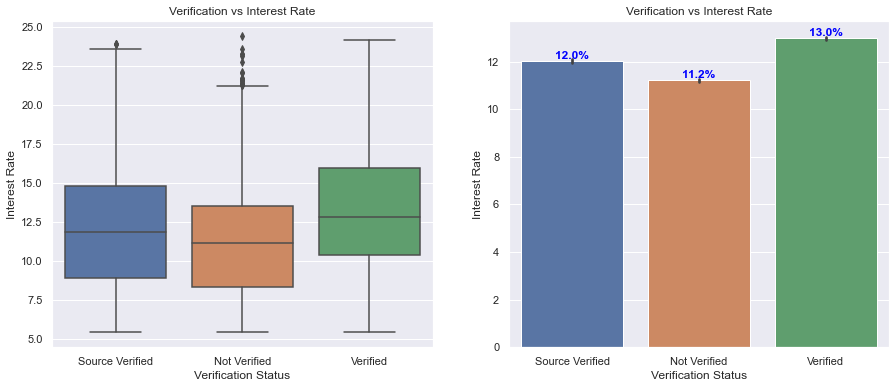

In [198]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.verification_status, y=loan.int_rate, data=loan)
plt.xlabel("Verification Status")
plt.title('Verification vs Interest Rate')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.verification_status, y=loan.int_rate, data=loan)
plt.xlabel("Verification Status")
plt.title('Verification vs Interest Rate')
plt.ylabel('Interest Rate')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- On an average interest rate for **Not Verified** is less (median around 11.2%) as compare to others.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Home Ownership vs Interest Rate</font>

In [199]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [200]:
loan.groupby(loan.home_ownership)['int_rate'].median()

home_ownership
MORTGAGE   11.49
OTHER      11.89
OWN        11.71
RENT       12.21
Name: int_rate, dtype: float64

In [201]:
loan.home_ownership.describe()

count     35367
unique        4
top        RENT
freq      17065
Name: home_ownership, dtype: object

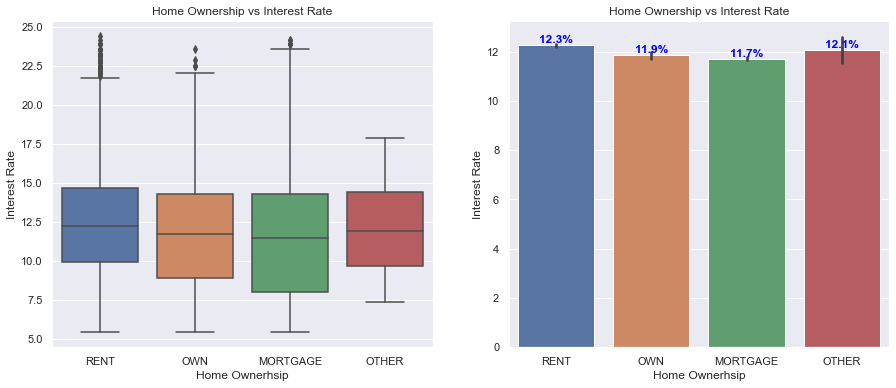

In [202]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.home_ownership, y=loan.int_rate, data=loan)
plt.xlabel("Home Ownerhsip")
plt.title('Home Ownership vs Interest Rate')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.home_ownership, y=loan.int_rate, data=loan)
plt.xlabel("Home Ownerhsip")
plt.title('Home Ownership vs Interest Rate')
plt.ylabel('Interest Rate')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- On an average interest rate for **MORTAGE** and **OWN** is less as compare to others.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Loan Status vs Interest Rate</font>

In [203]:
loan.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [204]:
loan.groupby(loan.loan_status)['int_rate'].median()

loan_status
Charged Off   13.79
Fully Paid    11.49
Name: int_rate, dtype: float64

In [205]:
loan.loan_status.describe()

count          35367
unique             2
top       Fully Paid
freq           30424
Name: loan_status, dtype: object

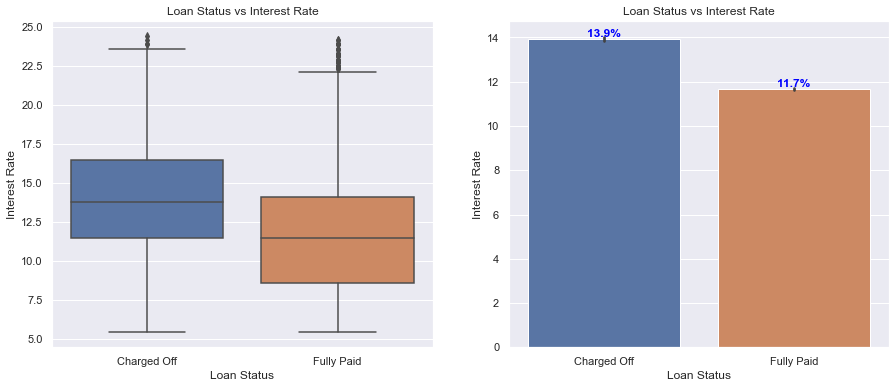

In [206]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.loan_status, y=loan.int_rate, data=loan)
plt.xlabel("Loan Status")
plt.title('Loan Status vs Interest Rate')
plt.ylabel('Interest Rate')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.loan_status, y=loan.int_rate, data=loan)
plt.xlabel("Loan Status")
plt.title('Loan Status vs Interest Rate')
plt.ylabel('Interest Rate')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, **Charged Off** loan are more when **Interest Rate** is high.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Purpose vs Interest Rate</font>

In [207]:
loan.purpose.unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [208]:
loan.groupby(loan.purpose)['int_rate'].median()

purpose
car                  10.37
credit_card          11.49
debt_consolidation   12.42
educational          11.89
home_improvement     11.11
house                11.94
major_purchase       10.75
medical              11.49
moving               11.36
other                11.71
renewable_energy     11.11
small_business       12.87
vacation             10.74
wedding              11.71
Name: int_rate, dtype: float64

In [209]:
loan.purpose.describe()

count                  35367
unique                    14
top       debt_consolidation
freq                   16911
Name: purpose, dtype: object

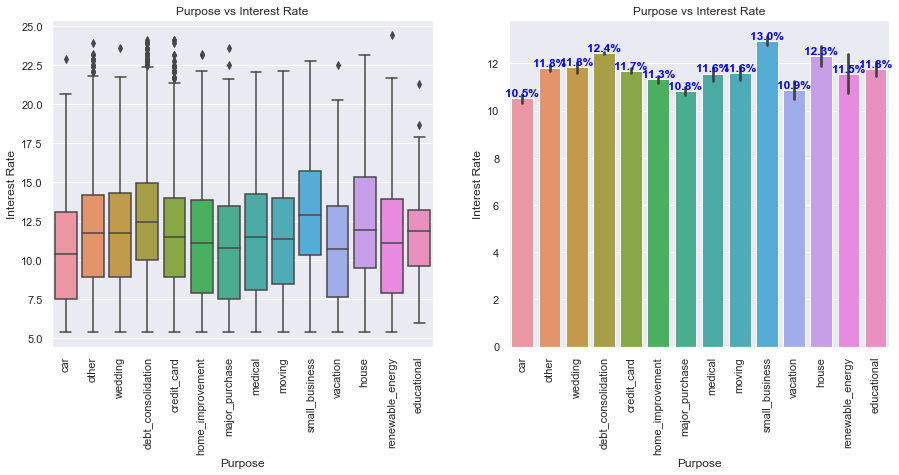

In [210]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.purpose, y=loan.int_rate, data=loan)
plt.xlabel("Purpose")
plt.title('Purpose vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.purpose, y=loan.int_rate, data=loan)
plt.xlabel("Purpose")
plt.title('Purpose vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, **Small Business** and **Debt Consolidation** are given with more interest rates comparatively others.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Employee Experience vs Interest Rate</font>

In [211]:
loan.emp_length.unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [212]:
loan.groupby(loan.emp_length)['int_rate'].median()

emp_length
1 year      11.99
10+ years   11.71
2 years     11.86
3 years     11.83
4 years     11.89
5 years     11.83
6 years     11.71
7 years     11.86
8 years     11.71
9 years     11.71
< 1 year    11.83
Name: int_rate, dtype: float64

In [213]:
loan.emp_length.describe()

count         35367
unique           11
top       10+ years
freq           8028
Name: emp_length, dtype: object

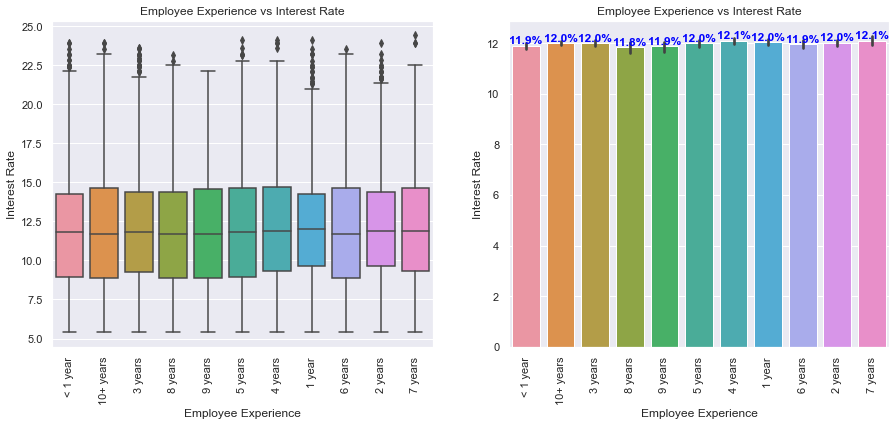

In [214]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.emp_length, y=loan.int_rate, data=loan)
plt.xlabel("Employee Experience")
plt.title('Employee Experience vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.emp_length, y=loan.int_rate, data=loan)
plt.xlabel("Employee Experience")
plt.title('Employee Experience vs Interest Rate')
plt.ylabel('Interest Rate')
plt.xticks(rotation=90)
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, there is no such difference between employee experience and interest rate.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Issue Date(By Month & Year) vs Interest Rate</font>

In [215]:
loan.issue_d_month.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [216]:
loan.issue_d_year.unique()

array([2011, 2010, 2009, 2008, 2007], dtype=int64)

In [217]:
loan.issue_d_month.describe()

count     35367
unique       12
top         Dec
freq       3820
Name: issue_d_month, dtype: object

In [218]:
loan.issue_d_year.describe()

count   35367.00
mean     2010.35
std         0.81
min      2007.00
25%      2010.00
50%      2011.00
75%      2011.00
max      2011.00
Name: issue_d_year, dtype: float64

-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Issue Date By Month

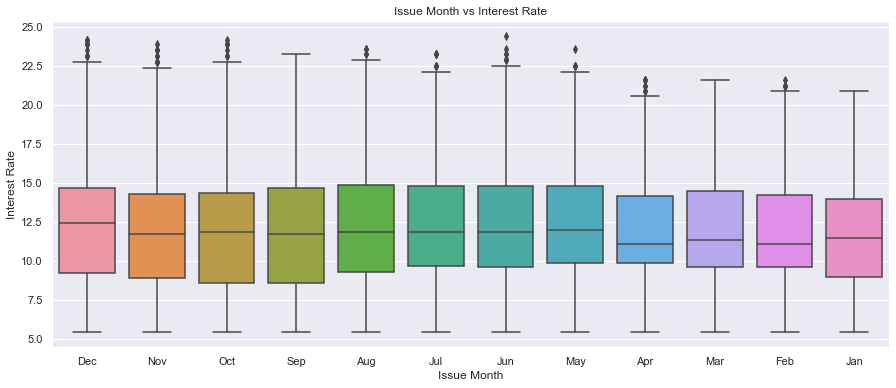

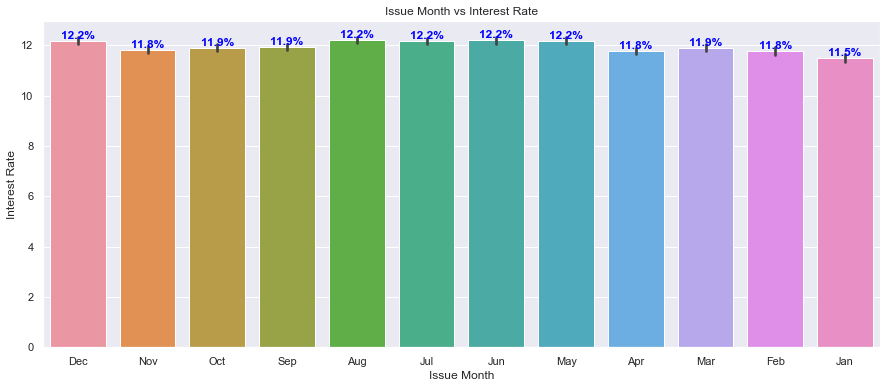

In [219]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=loan.issue_d_month, y=loan.int_rate, data=loan)
plt.xlabel("Issue Month")
plt.title('Issue Month vs Interest Rate')
plt.ylabel('Interest Rate')
plt.show()
plt.figure(figsize=(15,6))
ax = sns.barplot(x=loan.issue_d_month, y=loan.int_rate, data=loan)
plt.xlabel("Issue Month")
plt.title('Issue Month vs Interest Rate')
plt.ylabel('Interest Rate')
showDistributionLabels(ax)
plt.show()

#### Issue Date By Year

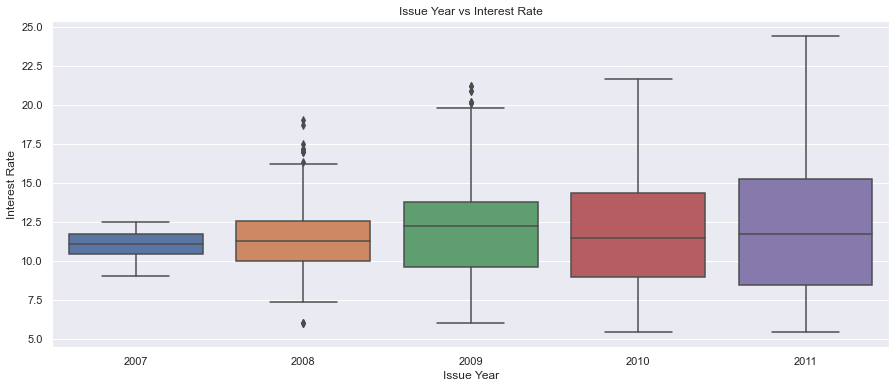

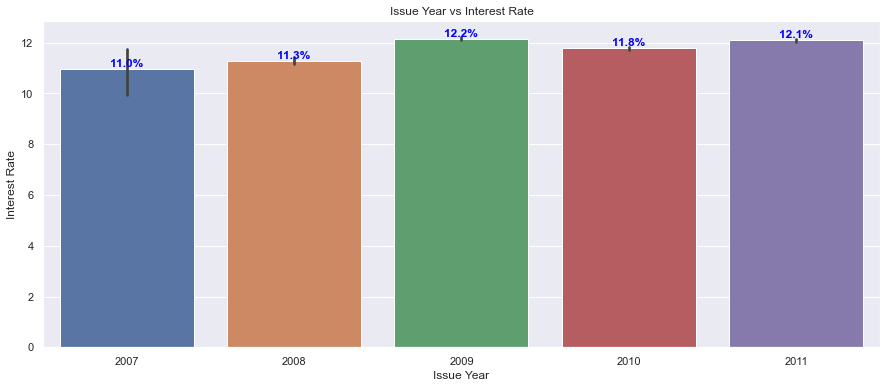

In [220]:
plt.figure(figsize=(15,6))
ax = sns.boxplot(x=loan.issue_d_year, y=loan.int_rate, data=loan)
plt.xlabel("Issue Year")
plt.title('Issue Year vs Interest Rate')
plt.ylabel('Interest Rate')
plt.show()
plt.figure(figsize=(15,6))
ax = sns.barplot(x=loan.issue_d_year, y=loan.int_rate, data=loan)
plt.xlabel("Issue Year")
plt.title('Issue Year vs Interest Rate')
plt.ylabel('Interest Rate')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, interest rates are getting more diversed, so it is not showing any relation.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 3. Annual Income

In [221]:
loan.annual_inc.unique()

array([ 30000.  ,  49200.  ,  36000.  , ...,  11029.  , 100671.39,
        36153.  ])

In [222]:
loan.annual_inc.describe()

count     35367.00
mean      69095.99
std       63967.05
min        4000.00
25%       41500.00
50%       60000.00
75%       82500.00
max     6000000.00
Name: annual_inc, dtype: float64

#### <font color = blue>Verification Status vs Annual Income</font>

In [223]:
loan.groupby(loan.verification_status)['annual_inc'].median()

verification_status
Not Verified      53000.00
Source Verified   55000.00
Verified          70000.00
Name: annual_inc, dtype: float64

In [224]:
loan.verification_status.describe()

count            35367
unique               3
top       Not Verified
freq             14840
Name: verification_status, dtype: object

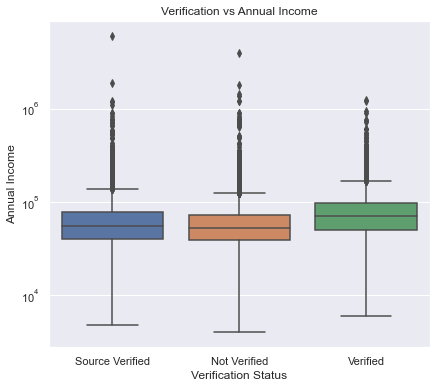

In [225]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.verification_status, y=loan.annual_inc, data=loan)
plt.xlabel("Verification Status")
plt.title('Verification vs Annual Income')
plt.ylabel('Annual Income')
plt.yscale('log')
plt.show()

<font color="maroon">**Observations:**
- The income source was verfied for most of the borrower's who had higher annual incomes.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Home Ownership vs Annual Income Rate</font>

In [226]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [227]:
loan.groupby(loan.home_ownership)['annual_inc'].median()

home_ownership
MORTGAGE   70885.00
OTHER      60000.00
OWN        49989.00
RENT       50000.00
Name: annual_inc, dtype: float64

In [228]:
loan.home_ownership.describe()

count     35367
unique        4
top        RENT
freq      17065
Name: home_ownership, dtype: object

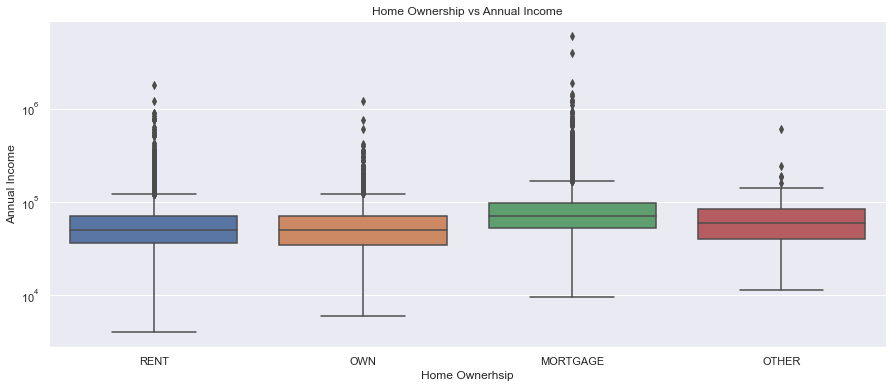

In [229]:
plt.figure(figsize=(15,6))
#plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.home_ownership, y=loan.annual_inc, data=loan)
plt.xlabel("Home Ownerhsip")
plt.title('Home Ownership vs Annual Income')
plt.ylabel('Annual Income')
plt.yscale('log')
plt.show()

<font color="maroon">**Observations:**
- Borrower having more income taking more **MORTGAGE** loan.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Grade vs Annual Income</font>

In [230]:
loan.sub_grade.unique()

array(['C4', 'C1', 'A4', 'C5', 'E1', 'B5', 'C3', 'B1', 'B2', 'D1', 'A1',
       'B3', 'B4', 'D2', 'A5', 'A3', 'A2', 'E4', 'D3', 'C2', 'F2', 'D4',
       'F3', 'E3', 'F1', 'D5', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [231]:
loan.groupby(loan.sub_grade)['annual_inc'].median()

sub_grade
A1    60000.00
A2    58000.00
A3    57220.00
A4    58875.50
A5    60000.00
B1    55000.00
B2    56880.00
B3    59000.00
B4    60000.00
B5    58000.00
C1    56000.02
C2    57000.00
C3    57000.00
C4    57000.00
C5    55000.00
D1    56000.00
D2    60000.00
D3    57996.00
D4    60000.00
D5    61000.00
E1    61200.00
E2    63300.00
E3    62000.00
E4    65178.50
E5    76934.00
F1    71964.00
F2    70000.00
F3    73720.00
F4    70000.00
F5    77368.00
G1    76500.00
G2    74727.00
G3    77004.00
G4    95000.00
G5   100000.00
Name: annual_inc, dtype: float64

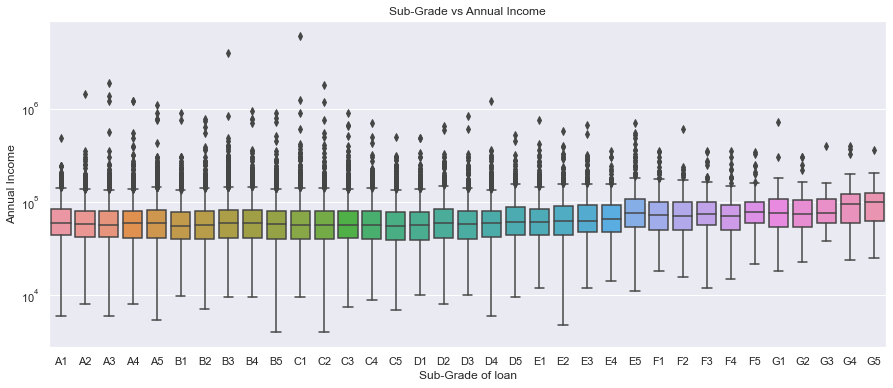

In [232]:
plt.figure(figsize=(15,6))
#plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.sub_grade.sort_values(), y=loan.annual_inc, data=loan)
plt.xlabel("Sub-Grade of loan")
plt.title('Sub-Grade vs Annual Income')
plt.ylabel('Annual Income')
plt.yscale('log')
plt.show()

<font color="maroon">**Observations:**
- Borrower having higher annual income above 10,00,000 their loan category come under a sub-grade loan between A to D.
- Higher the annual income, allocated grade will be between A to D.
- Specially A2, A3, A4, A5, B3, C1, C2, D4 sub-grade category is allocate for higher annual income borrower.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Loan Status vs Annual Income</font>

In [233]:
loan.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [234]:
loan.groupby(loan.loan_status)['annual_inc'].median()

loan_status
Charged Off   54000.00
Fully Paid    60000.00
Name: annual_inc, dtype: float64

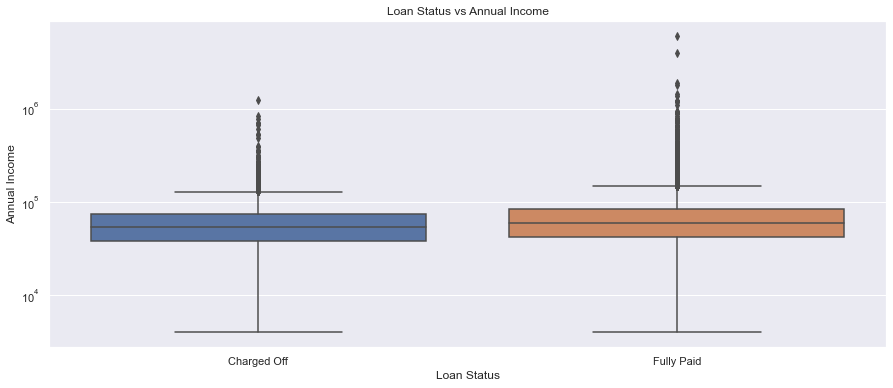

In [235]:
plt.figure(figsize=(15,6))
#plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.loan_status, y=loan.annual_inc, data=loan)
plt.xlabel("Loan Status")
plt.title('Loan Status vs Annual Income')
plt.ylabel('Annual Income')
plt.yscale('log')
plt.show()

<font color="maroon">**Observations:**
- Based on above data, **Charged Off** loan are **more** when **Annual Income** is **low**.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Purpose vs Annual Income</font>

In [236]:
loan.purpose.unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [237]:
loan.groupby(loan.purpose)['annual_inc'].median()

purpose
car                  55000.00
credit_card          60000.00
debt_consolidation   59000.00
educational          44000.00
home_improvement     72000.00
house                63600.00
major_purchase       55000.00
medical              57600.00
moving               50000.00
other                53000.00
renewable_energy     68724.00
small_business       63000.00
vacation             52691.00
wedding              60000.00
Name: annual_inc, dtype: float64

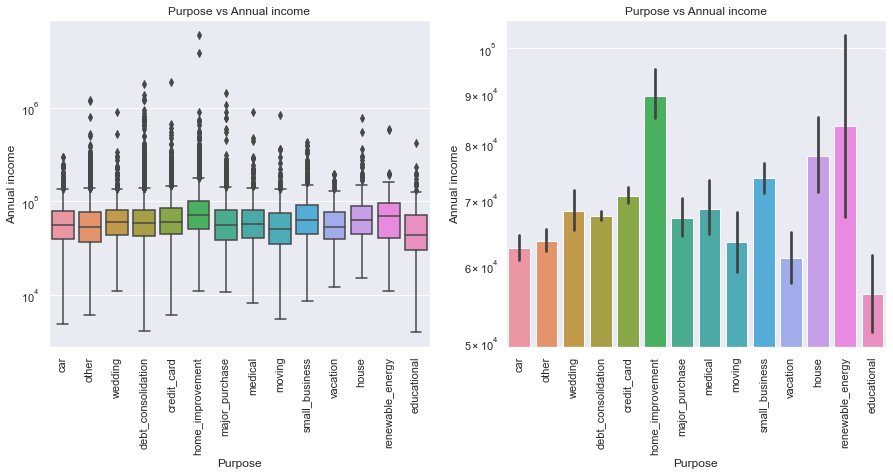

In [238]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.purpose, y=loan.annual_inc, data=loan)
plt.xlabel("Purpose")
plt.title('Purpose vs Annual income')
plt.ylabel('Annual income')
plt.xticks(rotation=90)
plt.yscale('log')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.purpose, y=loan.annual_inc, data=loan)
plt.xlabel("Purpose")
plt.title('Purpose vs Annual income')
plt.ylabel('Annual income')
plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, borrower having **high** annual income taken loan for **home improvement**, **renewable energy** and **small business** while borrower having **low** annual income taken loan for **educational**, **moving** and **vacation**.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## 4. Debt to Income Ratio (DTI)

#### <font color = blue>Term vs Debt to income</font>

In [239]:
loan.groupby(loan.term)['dti'].median()

term
36 months   13.17
60 months   14.42
Name: dti, dtype: float64

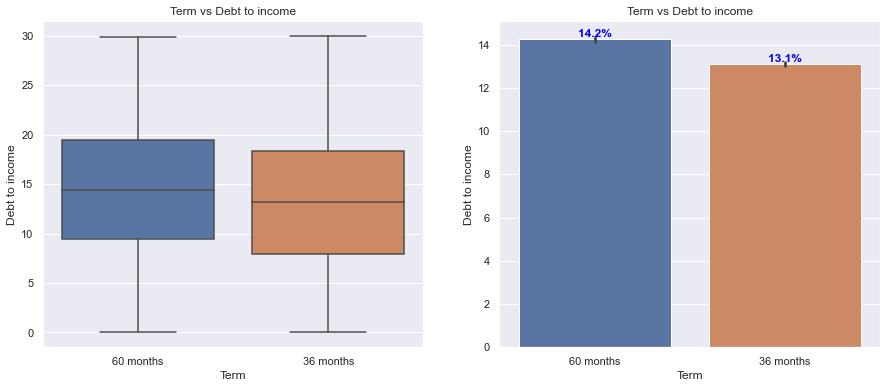

In [240]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.term, y=loan.dti, data=loan)
plt.xlabel("Term")
plt.title('Term vs Debt to income')
plt.ylabel('Debt to income')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.term, y=loan.dti, data=loan, estimator=np.mean)
plt.xlabel("Term")
plt.title('Term vs Debt to income')
plt.ylabel('Debt to income')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- DTI is bit **high** for people who got more tenure i.e. **60 months**.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Grade vs Debt to income</font>

In [241]:
loan.groupby(loan.grade)['dti'].median()

grade
A   11.71
B   13.63
C   14.18
D   14.37
E   14.44
F   14.77
G   14.86
Name: dti, dtype: float64

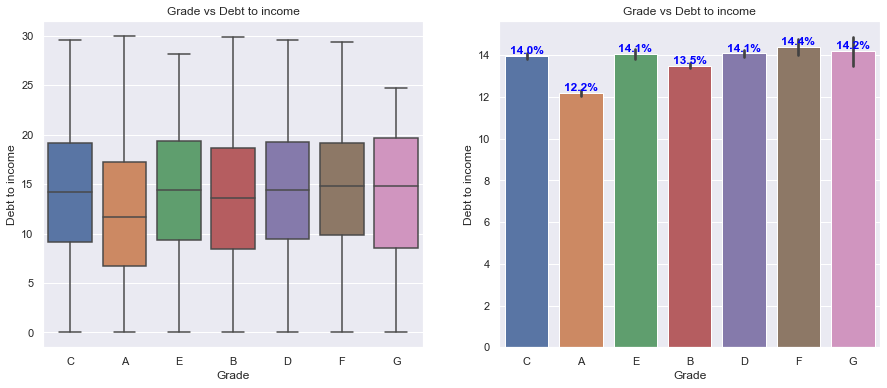

In [242]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.grade, y=loan.dti, data=loan)
plt.xlabel("Grade")
plt.title('Grade vs Debt to income')
plt.ylabel('Debt to income')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.grade, y=loan.dti, data=loan, estimator=np.mean)
plt.xlabel("Grade")
plt.title('Grade vs Debt to income')
plt.ylabel('Debt to income')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- **A Grade** borrowers are having **low** DTI than other grades. DTI should be low for having high repayment percentage.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Purpose vs Debt to income</font>

In [243]:
loan.purpose.unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [244]:
loan.purpose.describe()

count                  35367
unique                    14
top       debt_consolidation
freq                   16911
Name: purpose, dtype: object

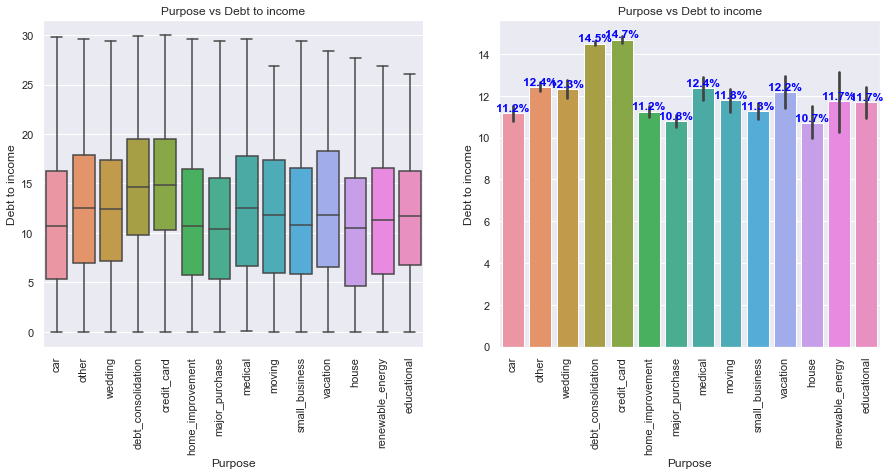

In [245]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.purpose, y=loan.dti, data=loan)
plt.xlabel("Purpose")
plt.title('Purpose vs Debt to income')
plt.ylabel('Debt to income')
plt.xticks(rotation=90)
#plt.yscale('log')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.purpose, y=loan.dti, data=loan)
plt.xlabel("Purpose")
plt.title('Purpose vs Debt to income')
plt.ylabel('Debt to income')
#plt.yscale('log')
plt.xticks(rotation=90)
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- People who took loan for **credit card** and **debt consolidation** purpose has more DTI than other purposes.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

#### <font color = blue>Home Ownership vs Debt to income</font>

In [246]:
loan.groupby(loan.home_ownership)['dti'].median()

home_ownership
MORTGAGE   13.23
OTHER      10.99
OWN        13.50
RENT       13.78
Name: dti, dtype: float64

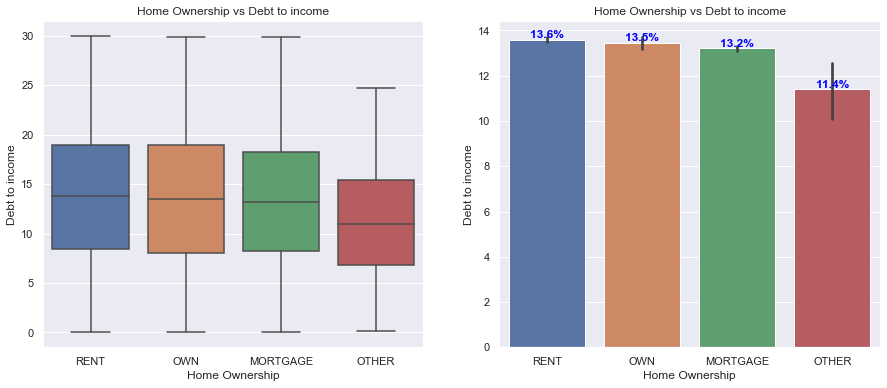

In [247]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
ax = sns.boxplot(x=loan.home_ownership, y=loan.dti, data=loan)
plt.xlabel("Home Ownership")
plt.title('Home Ownership vs Debt to income')
plt.ylabel('Debt to income')
plt.subplot(1,2,2)
ax = sns.barplot(x=loan.home_ownership, y=loan.dti, data=loan, estimator=np.mean)
plt.xlabel("Home Ownership")
plt.title('Home Ownership vs Debt to income')
plt.ylabel('Debt to income')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Borrower of **Other** home ownership category has **less** DTI than others.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## <font color = green>Bivariate Analysis</font>

### <font color = blue>Term vs Loan Status</font>

In [248]:
loan.term.unique()

array(['60 months', '36 months'], dtype=object)

In [249]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivterm = loan.groupby(['term','loan_status']).loan_status.count()/loan.groupby(['term']).loan_status.count()*100
bivterm = pd.DataFrame(bivterm)
bivterm.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivterm = pd.DataFrame(bivterm.to_records())
bivterm.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivterm.reset_index(inplace=True,drop=True)

In [250]:
bivterm.head()

,term,loan_status,Loan Status Rate
0,36 months,Fully Paid,89.65
1,60 months,Fully Paid,75.38
2,60 months,Charged Off,24.62
3,36 months,Charged Off,10.35


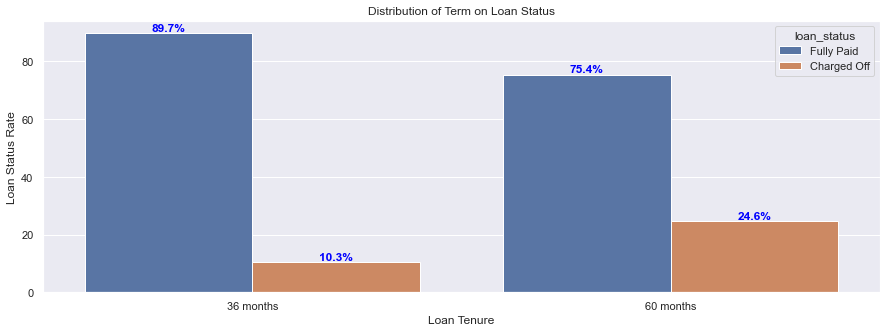

In [251]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y="Loan Status Rate",x="term",data=bivterm,hue="loan_status")
plt.title('Distribution of Term on Loan Status')
plt.xlabel('Loan Tenure')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, **Charged off** loan cases are more when tenure is more.
- So **higher** the tenure loan chance of **Charged Off** is more.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Issue Date vs Loan Status</font>

In [252]:
loan.issue_d_month.unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [253]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivissm = loan.groupby(['issue_d_month','loan_status']).loan_status.count()/loan.groupby(['issue_d_month']).loan_status.count()*100
bivissm = pd.DataFrame(bivissm)
bivissm.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivissm = pd.DataFrame(bivissm.to_records())
bivissm.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivissm.reset_index(inplace=True,drop=True)

In [254]:
bivissm.head(30).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
issue_d_month,Feb,Mar,Jan,Apr,Aug,Jul,Nov,Jun,Oct,Sep,May,Dec,Dec,May,Sep,Oct,Jun,Nov,Jul,Aug,Apr,Jan,Mar,Feb
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off
Loan Status Rate,89.11,87.93,87.45,87.22,86.57,86.10,85.94,85.59,85.13,84.86,84.59,84.32,15.68,15.41,15.14,14.87,14.41,14.06,13.90,13.43,12.78,12.55,12.07,10.89


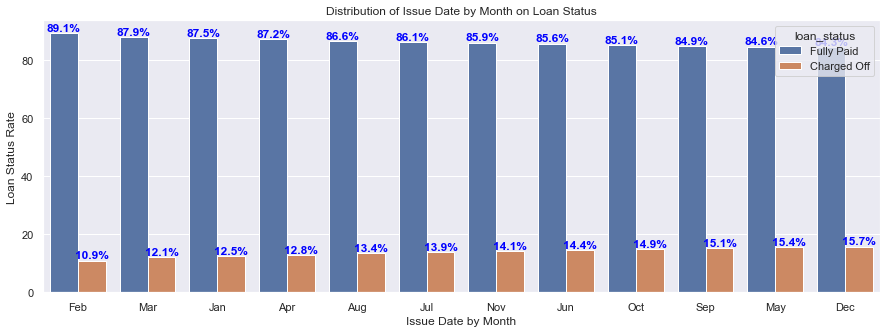

In [255]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y="Loan Status Rate",x="issue_d_month",data=bivissm,hue="loan_status")
plt.title('Distribution of Issue Date by Month on Loan Status')
plt.xlabel('Issue Date by Month')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, **Charged off** loan cases are more in Sep, May and Dec.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Grade vs Loan Status</font>

In [256]:
loan.grade.unique()

array(['C', 'A', 'E', 'B', 'D', 'F', 'G'], dtype=object)

In [257]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivgrade = loan.groupby(['grade','loan_status']).loan_status.count()/loan.groupby(['grade']).loan_status.count()*100
bivgrade = pd.DataFrame(bivgrade)
bivgrade.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivgrade = pd.DataFrame(bivgrade.to_records())
bivgrade.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivgrade.reset_index(inplace=True,drop=True)

In [258]:
bivgrade.head(20).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
grade,A,B,C,D,E,F,G,G,F,E,D,C,B,A
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off
Loan Status Rate,94.39,88.31,83.71,78.98,73.88,68.29,67.02,32.98,31.71,26.12,21.02,16.29,11.69,5.61


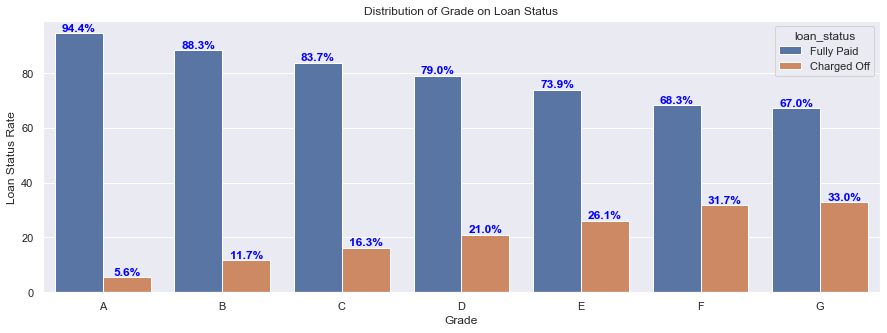

In [259]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y="Loan Status Rate",x="grade",data=bivgrade,hue="loan_status")
plt.title('Distribution of Grade on Loan Status')
plt.xlabel('Grade')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- From the above data, we say that for **Grade A**, the percentage of loans that were **Charged Off** is **5.6%**.
- For **Grade G**, the percentage of loans that were **Charged Off** is **33.0%**.
- So seeing above, higher the Grade higher the Charged Off Loan.
- Thus the lending company should lend more A grade loans.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Sub-Grade vs Loan Status</font>

In [260]:
loan.sub_grade.unique()

array(['C4', 'C1', 'A4', 'C5', 'E1', 'B5', 'C3', 'B1', 'B2', 'D1', 'A1',
       'B3', 'B4', 'D2', 'A5', 'A3', 'A2', 'E4', 'D3', 'C2', 'F2', 'D4',
       'F3', 'E3', 'F1', 'D5', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

In [261]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivsubgrade = loan.groupby(['sub_grade','loan_status']).loan_status.count()/loan.groupby(['sub_grade']).loan_status.count()*100
bivsubgrade = pd.DataFrame(bivsubgrade)
bivsubgrade.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivsubgrade = pd.DataFrame(bivsubgrade.to_records())
bivsubgrade.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivsubgrade.reset_index(inplace=True,drop=True)

In [262]:
bivsubgrade.head(30).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,D1,C4,C5,C3,D2,E3,D3,D4,G4,D5,E2,E1,E5,F3,F1,E4,F2,G1
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid
Loan Status Rate,97.71,95.35,95.09,94.06,92.40,91.26,89.53,88.14,87.41,86.46,84.63,84.25,83.33,83.29,82.79,82.76,80.07,78.22,77.79,77.36,75.93,75.88,74.03,73.23,72.41,71.88,71.33,70.81,70.56,70.45


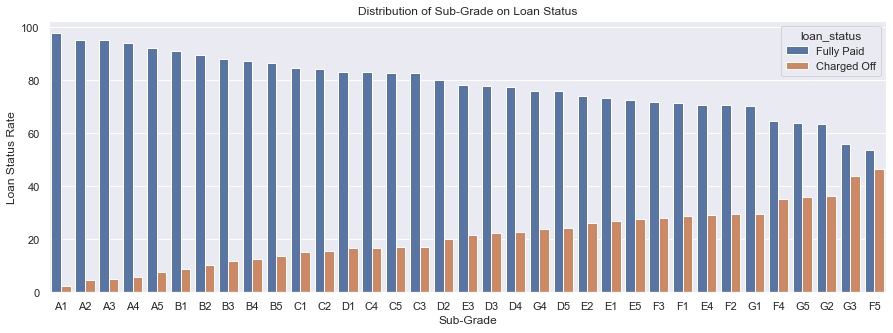

In [263]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y="Loan Status Rate",x="sub_grade",data=bivsubgrade,hue="loan_status")
plt.title('Distribution of Sub-Grade on Loan Status')
plt.xlabel('Sub-Grade')
#showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- From the above data, we say that **Charged Off** loan is increasing as the **Sub-grade** also increasing.
- As **Grade A** is more efficient but in that also sub-grade **A1** is better.
- Thus the lending company should lend more **A1** sub-grade loans.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Home Ownership vs Loan Status</font>

In [264]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [265]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivhomeowner = loan.groupby(['home_ownership','loan_status']).loan_status.count()/loan.groupby(['home_ownership']).loan_status.count()*100
bivhomeowner = pd.DataFrame(bivhomeowner)
bivhomeowner.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivhomeowner = pd.DataFrame(bivhomeowner.to_records())
bivhomeowner.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivhomeowner.reset_index(inplace=True,drop=True)

In [266]:
bivhomeowner.head(10)

,home_ownership,loan_status,Loan Status Rate
0,MORTGAGE,Fully Paid,86.87
1,OWN,Fully Paid,86.19
2,RENT,Fully Paid,85.25
3,OTHER,Fully Paid,80.85
4,OTHER,Charged Off,19.15
5,RENT,Charged Off,14.75
6,OWN,Charged Off,13.81
7,MORTGAGE,Charged Off,13.13


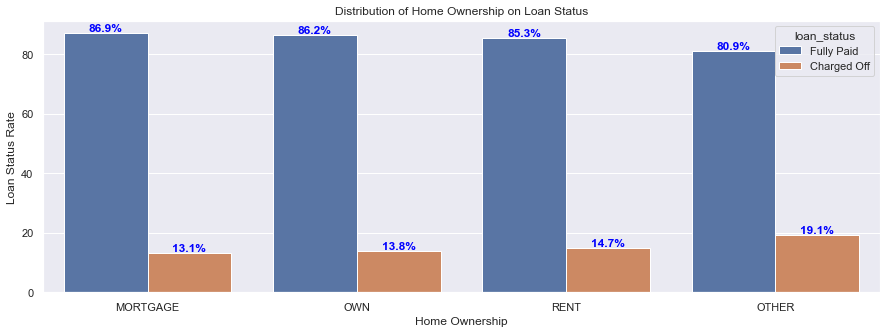

In [267]:
plt.figure(figsize=(15,5))
ax = sns.barplot(y="Loan Status Rate",x="home_ownership",data=bivhomeowner,hue="loan_status")
plt.title('Distribution of Home Ownership on Loan Status')
plt.xlabel('Home Ownership')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- From the above data, we say that every category is having **Charged Off** Loan betweeen **13%** to **19%**.
- Around **19.1%** of loan is **Charged Off** in **Other** category, which is higher as compared to others.
- Thus the lending company should try to give less loan or perform more due-diligence on **Rent** and **Other** category loans.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Borrower's State vs Loan Status</font>

In [268]:
loan.addr_state.unique()

array(['GA', 'CA', 'AZ', 'NC', 'TX', 'VA', 'IL', 'MO', 'CT', 'UT', 'FL',
       'PA', 'MN', 'NJ', 'OR', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA', 'NY',
       'WA', 'WI', 'AL', 'NV', 'AK', 'CO', 'MD', 'WV', 'VT', 'MI', 'DC',
       'NH', 'AR', 'NM', 'KS', 'HI', 'OK', 'MT', 'WY', 'SD', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN'], dtype=object)

In [269]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivaddst = loan.groupby(['addr_state','loan_status']).loan_status.count()/loan.groupby(['addr_state']).loan_status.count()*100
bivaddst = pd.DataFrame(bivaddst)
bivaddst.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivaddst = pd.DataFrame(bivaddst.to_records())
bivaddst.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivaddst.reset_index(inplace=True,drop=True)

In [270]:
bivaddst.head(100).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93
addr_state,ID,IA,IN,NE,WY,MS,DC,KS,DE,TX,LA,AR,PA,CO,MA,AL,CT,OH,WI,MT,WV,VT,VA,NY,MN,RI,IL,OK,MI,AZ,SC,UT,NC,KY,MD,NH,CA,WA,NJ,GA,MO,OR,HI,NM,FL,SD,TN,AK,NV,NV,AK,TN,SD,FL,NM,HI,OR,MO,GA,NJ,WA,CA,NH,MD,KY,NC,UT,SC,AZ,MI,OK,IL,RI,MN,NY,VA,VT,WV,MT,WI,OH,CT,AL,MA,CO,PA,AR,LA,TX,DE,KS,DC,MS,WY
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off
Loan Status Rate,100.00,100.00,100.00,100.00,96.00,94.44,93.10,89.70,89.52,88.87,88.43,88.43,88.35,88.27,88.23,88.16,88.07,87.41,87.34,87.32,87.26,87.23,87.14,87.06,87.00,86.49,86.46,86.40,86.12,86.02,85.78,85.59,85.42,85.32,85.26,85.14,84.74,84.72,84.64,84.52,84.40,84.13,83.01,82.82,82.76,81.82,80.00,79.45,78.05,21.95,20.55,20.00,18.18,17.24,17.18,16.99,15.87,15.60,15.48,15.36,15.28,15.26,14.86,14.74,14.68,14.58,14.41,14.22,13.98,13.88,13.60,13.54,13.51,13.00,12.94,12.86,12.77,12.74,12.68,12.66,12.59,11.93,11.84,11.77,11.73,11.65,11.57,11.57,11.13,10.48,10.30,6.90,5.56,4.00


In [271]:
loan[loan.addr_state == "ID"]

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_month,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,loan_status_flag,experience_level,emp_length_bins,dti_bins,annual_inc_bins
35148,9600,36 months,10.08,310.13,B,B3,St. Alphonsus,4 years,MORTGAGE,60000.00,Not Verified,2008-04-01,Fully Paid,debt_consolidation,maynard debt,ID,19.72,0,1994-05-01,0,8,0,19500,30.90,14,0.00,Apr,2008,5,1994,0,4,senior,mid dti,Mid Range
35280,6000,36 months,12.92,201.94,D,D2,St Lukes Medical Center,1 year,MORTGAGE,40800.00,Not Verified,2008-03-01,Fully Paid,debt_consolidation,debt consolidation,ID,15.32,2,2000-10-01,2,11,0,7091,47.30,13,0.00,Mar,2008,10,2000,0,1,junior,mid dti,Low
35283,6150,36 months,11.03,201.44,C,C1,Colliers International,1 year,RENT,35713.60,Not Verified,2008-03-01,Fully Paid,credit_card,Refinancing 2 high-interest credit cards,ID,17.10,0,2004-10-01,0,4,0,6111,64.30,6,0.00,Mar,2008,10,2004,0,1,junior,mid dti,Low


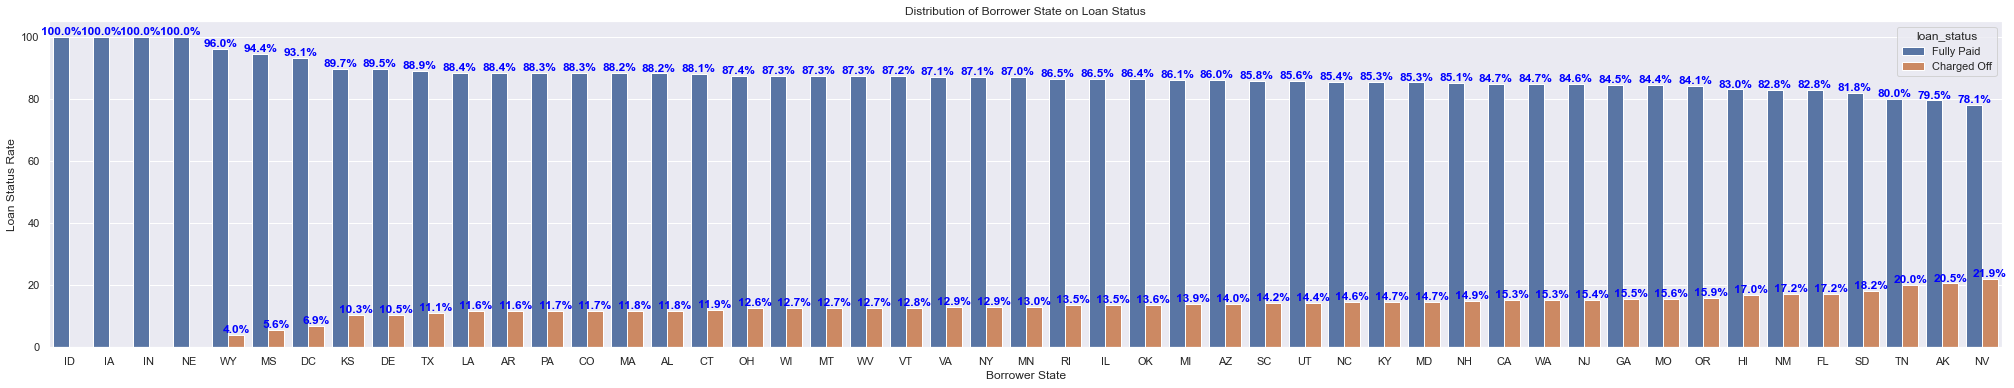

In [272]:
plt.figure(figsize=(35,6))
ax = sns.barplot(y="Loan Status Rate",x="addr_state",data=bivaddst,hue="loan_status")
plt.title('Distribution of Borrower State on Loan Status')
plt.xlabel('Borrower State')
showDistributionLabels(ax)

plt.show()

<font color="maroon">**Observations:**
- From the above data, we say that **NV**, **AK** and **TN** states are having more **Charged Off** Loan around **20%**.
- Thus the lending company should try to investigate more and careful while approving loan for above states.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Verification Status vs Loan Status</font>

In [273]:
loan.verification_status.unique()

array(['Source Verified', 'Not Verified', 'Verified'], dtype=object)

In [274]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivverst = loan.groupby(['verification_status','loan_status']).loan_status.count()/loan.groupby(['verification_status']).loan_status.count()*100
bivverst = pd.DataFrame(bivverst)
bivverst.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivverst = pd.DataFrame(bivverst.to_records())
bivverst.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivverst.reset_index(inplace=True,drop=True)

In [275]:
bivverst.head(10)

,verification_status,loan_status,Loan Status Rate
0,Not Verified,Fully Paid,88.07
1,Source Verified,Fully Paid,85.57
2,Verified,Fully Paid,83.71
3,Verified,Charged Off,16.29
4,Source Verified,Charged Off,14.43
5,Not Verified,Charged Off,11.93


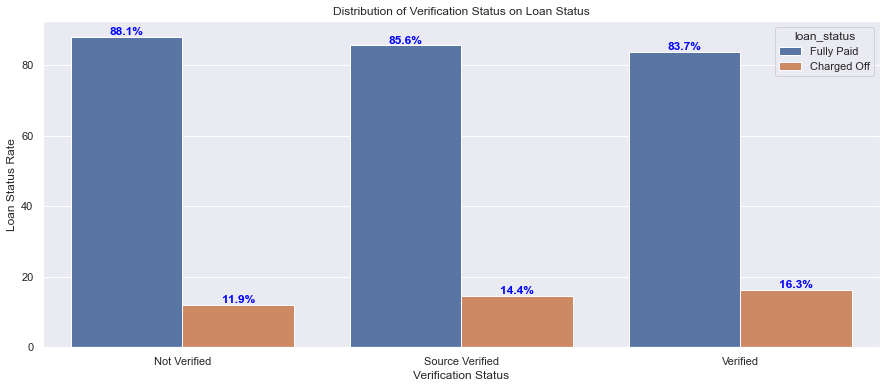

In [276]:
plt.figure(figsize=(15,6))
ax = sns.barplot(y="Loan Status Rate",x="verification_status",data=bivverst,hue="loan_status")
plt.title('Distribution of Verification Status on Loan Status')
plt.xlabel('Verification Status')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- From the above data, all category is showing some kind of similary **Charged Off** Loan so this will not give more information for analysis.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Purpose of Loan vs Loan Status</font>

In [277]:
loan.purpose.unique()

array(['car', 'other', 'wedding', 'debt_consolidation', 'credit_card',
       'home_improvement', 'major_purchase', 'medical', 'moving',
       'small_business', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [278]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivpur = loan.groupby(['purpose','loan_status']).loan_status.count()/loan.groupby(['purpose']).loan_status.count()*100
bivpur = pd.DataFrame(bivpur)
bivpur.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivpur = pd.DataFrame(bivpur.to_records())
bivpur.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivpur.reset_index(inplace=True,drop=True)

In [279]:
bivpur.head(30).transpose()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
purpose,wedding,major_purchase,credit_card,car,home_improvement,vacation,debt_consolidation,moving,medical,house,other,educational,renewable_energy,small_business,small_business,renewable_energy,educational,other,house,medical,moving,debt_consolidation,vacation,home_improvement,car,credit_card,major_purchase,wedding
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off,Charged Off
Loan Status Rate,90.40,90.37,89.65,89.32,88.68,85.24,85.16,84.89,84.73,84.24,84.23,83.70,82.76,73.65,26.35,17.24,16.30,15.77,15.76,15.27,15.11,14.84,14.76,11.32,10.68,10.35,9.63,9.60


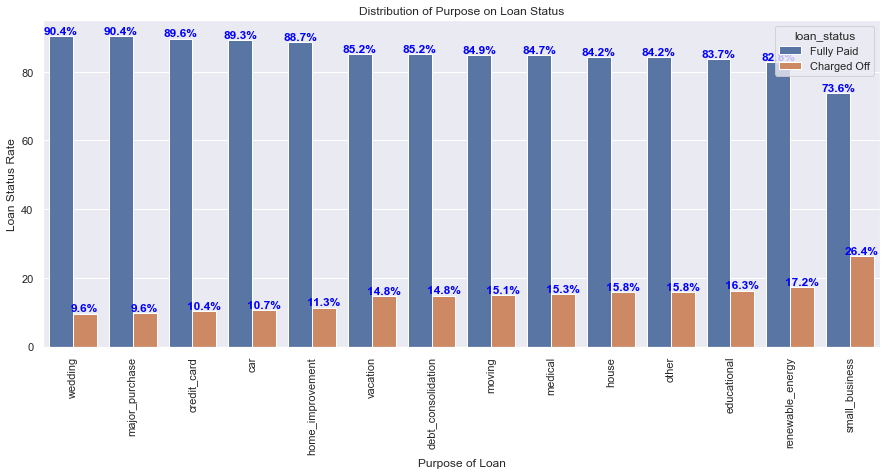

In [280]:
plt.figure(figsize=(15,6))
ax = sns.barplot(y="Loan Status Rate",x="purpose",data=bivpur,hue="loan_status")
plt.title('Distribution of Purpose on Loan Status')
plt.xlabel('Purpose of Loan')
showDistributionLabels(ax)
plt.xticks(rotation = 90)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, around **26.4%** of category **small_business** showing more **Charged Off** Loan as compare to others.
- Thus lending club should do more due-diligence and take more precaution while giving loan for **small business**.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Annual Income vs Loan Status</font>

In [281]:
loan.annual_inc.unique()

array([ 30000.  ,  49200.  ,  36000.  , ...,  11029.  , 100671.39,
        36153.  ])

In [282]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivaninc = loan.groupby(['annual_inc_bins','loan_status']).loan_status.count()/loan.groupby(['annual_inc_bins']).loan_status.count()*100
bivaninc = pd.DataFrame(bivaninc)
bivaninc.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivaninc = pd.DataFrame(bivaninc.to_records())
bivaninc.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivaninc.reset_index(inplace=True,drop=True)

In [283]:
bivaninc.head(5)

,annual_inc_bins,loan_status,Loan Status Rate
0,High,Fully Paid,89.44
1,Mid Range,Fully Paid,86.86
2,Low,Fully Paid,83.75
3,Low,Charged Off,16.25
4,Mid Range,Charged Off,13.14


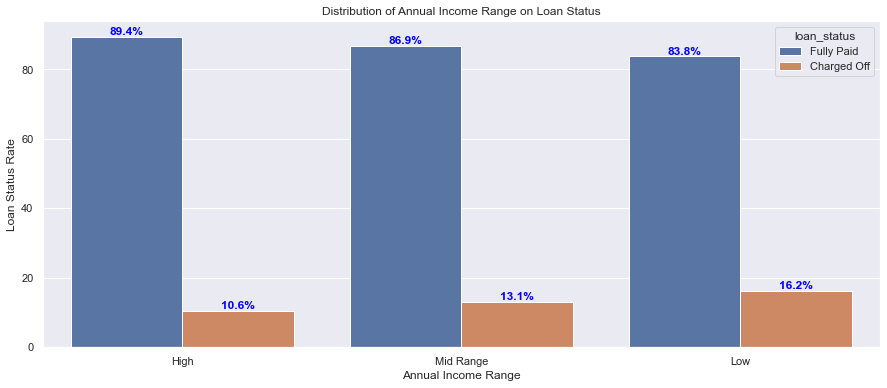

In [284]:
plt.figure(figsize=(15,6))
ax = sns.barplot(y="Loan Status Rate",x="annual_inc_bins",data=bivaninc,hue="loan_status")
plt.title('Distribution of Annual Income Range on Loan Status')
plt.xlabel('Annual Income Range')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, around **16.2%** of **Charged Off** Loan cases are more whose **Income is low** as compare to others.
- Thus lending club should do more due-diligence and take more precaution while giving loan for **Low income between 0 - 50000**.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Debt to income vs Loan Status</font>

In [285]:
loan.dti.unique()

array([ 1.  , 20.  , 11.2 , ...,  0.05,  0.12, 25.43])

In [286]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivdti = loan.groupby(['dti_bins','loan_status']).loan_status.count()/loan.groupby(['dti_bins']).loan_status.count()*100
bivdti = pd.DataFrame(bivdti)
bivdti.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivdti = pd.DataFrame(bivdti.to_records())
bivdti.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivdti.reset_index(inplace=True,drop=True)

In [287]:
bivdti.head(10)

,dti_bins,loan_status,Loan Status Rate
0,low dti,Fully Paid,88.23
1,mid dti,Fully Paid,85.38
2,high dti,Fully Paid,83.96
3,high dti,Charged Off,16.04
4,mid dti,Charged Off,14.62
5,low dti,Charged Off,11.77


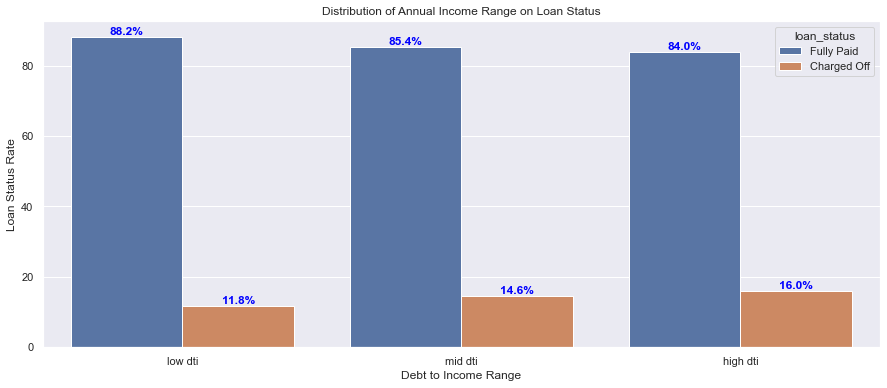

In [288]:
plt.figure(figsize=(15,6))
ax = sns.barplot(y="Loan Status Rate",x="dti_bins",data=bivdti,hue="loan_status")
plt.title('Distribution of Annual Income Range on Loan Status')
plt.xlabel('Debt to Income Range')
showDistributionLabels(ax)
plt.show()

<font color="maroon">**Observations:**
- Based on above data, around **16.0%** of **High DTI** having **Charged Off** Loan cases more as compare to others.
- So **higher** the debt to income, **higher** the chances of **Charged Off** loan.
- Thus lending club should try to avoid giving loans who have higher debt.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### <font color = blue>Employee Experience vs Loan Status</font>

In [289]:
loan.emp_length.unique()

array(['< 1 year', '10+ years', '3 years', '8 years', '9 years',
       '5 years', '4 years', '1 year', '6 years', '2 years', '7 years'],
      dtype=object)

In [290]:
#Let's create a new data frame which will contains data as a categorical form for bivariate analysis.
bivexpl = loan.groupby(['emp_length_bins','loan_status']).loan_status.count()
bivexpl = pd.DataFrame(bivexpl)
bivexpl.rename(columns={"loan_status":"Loan Status Rate"},inplace=True)
bivexpl = pd.DataFrame(bivexpl.to_records())
bivexpl.sort_values(by="Loan Status Rate",inplace=True,ascending=False)
bivexpl.reset_index(inplace=True,drop=True)

In [291]:
bivexpl.head(10)

,emp_length_bins,loan_status,Loan Status Rate
0,junior,Fully Paid,12865
1,expert,Fully Paid,8994
2,senior,Fully Paid,8565
3,junior,Charged Off,1988
4,expert,Charged Off,1571
5,senior,Charged Off,1384


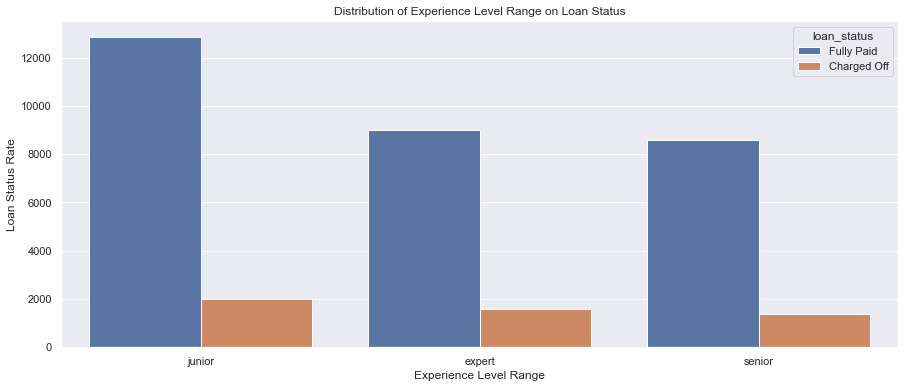

In [292]:
plt.figure(figsize=(15,6))
ax = sns.barplot(y="Loan Status Rate",x="emp_length_bins",data=bivexpl,hue="loan_status")
plt.title('Distribution of Experience Level Range on Loan Status')
plt.xlabel('Experience Level Range')
plt.show()

<font color="maroon">**Observations:**
- Based on above data, **Charged Off** Loan cases are more on **junior** level of experience ranges between **0 To 3 year**.
- So **lower** the experience level, **higher** the chances of **Charged Off** loan.
- Thus lending club should take more precaution and do due-diligence for 0-3 year of experience borrower.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**Let's use scatter plot on interest rate, dti and loan status**

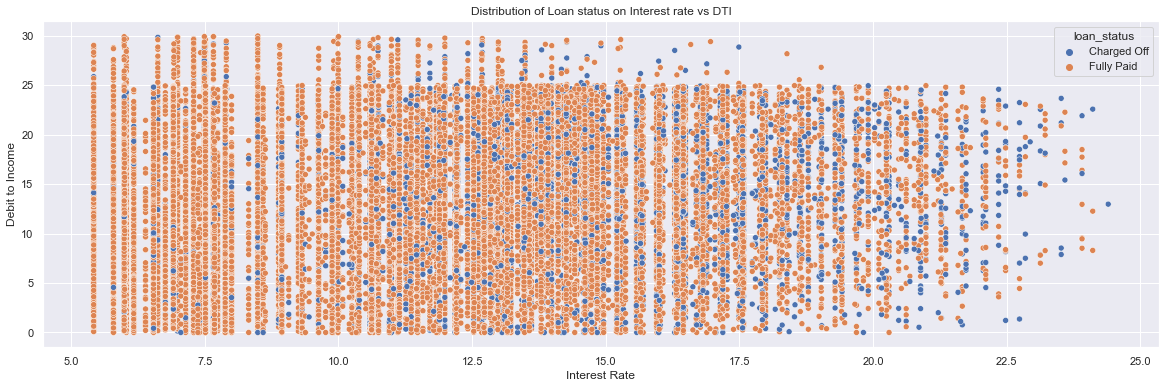

In [293]:
plt.figure(figsize=(20,6))
sns.scatterplot(x='int_rate', y='dti', data=loan, hue='loan_status')
plt.title('Distribution of Loan status on Interest rate vs DTI')
plt.xlabel("Interest Rate")
plt.ylabel("Debit to Income")
plt.show()

<font color = maroon>**Observations:**
- Values are spread all accross the graph but we can see one thing here irrespective of DTI when interest rates are high charged off loans are high.</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

### Correlation Matrix

`Let's find the correlation between below columns of Loan data set.`

In [294]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35367 entries, 0 to 35366
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   loan_amnt               35367 non-null  int64         
 1   term                    35367 non-null  object        
 2   int_rate                35367 non-null  float64       
 3   installment             35367 non-null  float64       
 4   grade                   35367 non-null  object        
 5   sub_grade               35367 non-null  object        
 6   emp_title               35367 non-null  object        
 7   emp_length              35367 non-null  object        
 8   home_ownership          35367 non-null  object        
 9   annual_inc              35367 non-null  float64       
 10  verification_status     35367 non-null  object        
 11  issue_d                 35367 non-null  datetime64[ns]
 12  loan_status             35367 non-null  object

In [295]:
#Finding correlation matric
corr_matrix = loan.corr()
corr_matrix

,loan_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,earliest_cr_line_month,earliest_cr_line_year,experience_level
loan_amnt,1.00,0.30,0.93,0.26,0.06,-0.04,0.01,0.17,-0.05,0.32,0.07,0.26,-0.03,0.12,-0.02,-0.20,0.14
int_rate,0.30,1.00,0.28,0.05,0.11,0.16,0.13,0.01,0.10,0.10,0.47,-0.04,0.08,0.03,-0.01,0.11,-0.00
installment,0.93,0.28,1.00,0.26,0.05,-0.02,0.01,0.17,-0.04,0.32,0.10,0.23,-0.03,0.06,-0.01,-0.17,0.12
annual_inc,0.26,0.05,0.26,1.00,-0.12,0.02,0.03,0.16,-0.01,0.27,0.02,0.23,-0.01,0.01,-0.01,-0.19,0.11
dti,0.06,0.11,0.05,-0.12,1.00,-0.04,0.00,0.29,-0.01,0.23,0.28,0.23,0.01,0.08,0.01,-0.04,0.05
delinq_2yrs,-0.04,0.16,-0.02,0.02,-0.04,1.00,0.01,0.01,0.01,-0.06,-0.04,0.07,0.01,0.00,-0.00,-0.07,0.01
inq_last_6mths,0.01,0.13,0.01,0.03,0.00,0.01,1.00,0.09,0.02,-0.02,-0.07,0.11,0.01,-0.06,-0.01,-0.01,0.01
open_acc,0.17,0.01,0.17,0.16,0.29,0.01,0.09,1.00,0.00,0.29,-0.09,0.68,0.01,0.01,0.00,-0.23,0.10
pub_rec,-0.05,0.10,-0.04,-0.01,-0.01,0.01,0.02,0.00,1.00,-0.06,0.06,-0.02,0.84,-0.02,-0.01,-0.05,0.07
revol_bal,0.32,0.10,0.32,0.27,0.23,-0.06,-0.02,0.29,-0.06,1.00,0.31,0.31,-0.05,-0.01,-0.01,-0.27,0.15


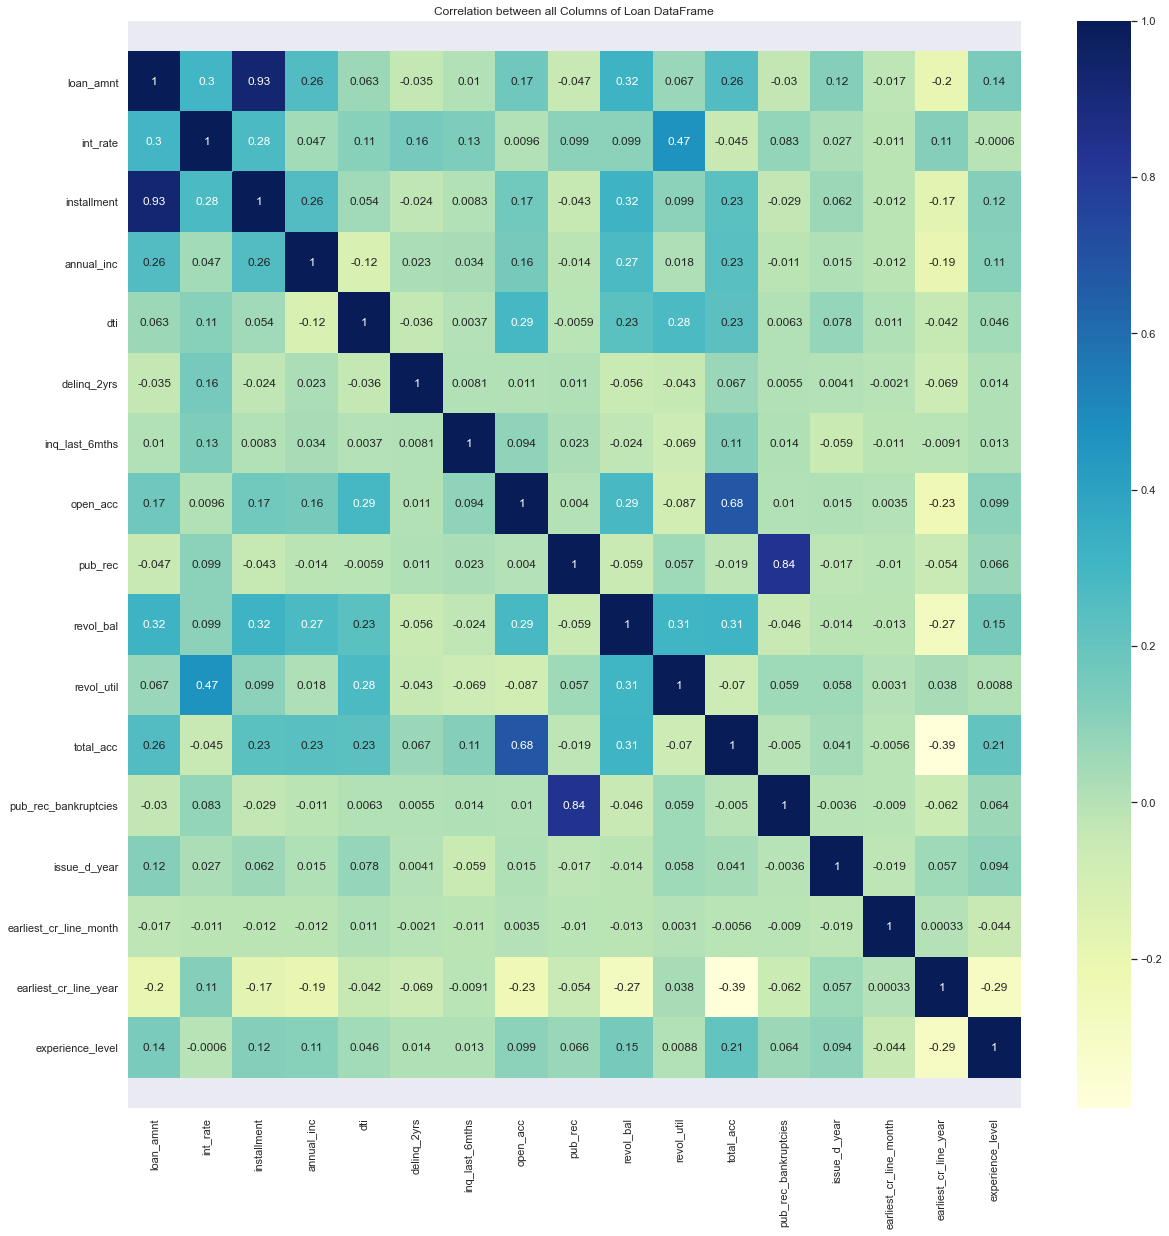

In [296]:
plt.figure(figsize=(20,20))
#plotting co-relation matrix on a heat map
ax = sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
top, bottom = ax.get_ylim()
ax.set_ylim(top+0.5, bottom-0.5)
plt.title("Correlation between all Columns of Loan DataFrame")
plt.show()

**Observation:**
- int_rate is correlated to revol_util with r factor of **0.47** - This is good, as company is charging higher interest for risk loan.
- loan_amnt and revol_bal are correlated with r factor **0.32** - This shows that higher loan amount is being approved to those borrowers who may become defaulter i.e. risky loan
- The **public derogatory records** colummn is correlated with **public bankruptcies records** with **0.84**. 
- Interest rates are high for people with high revol utilisation.
- Annual income with DTI (Debt to income ratio) is negatively correalted i.e **-0.12**
- Debt income ratio is the percentage of a consumer's monthly gross income that goes toward paying debts.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Overall Observation:
- <font color="maroon">**Charged Off** loan are more when **Interest Rate** is high.
- **Charged Off** loan are **more** when **Annual Income** is **low**. 
- **Charged Off** loan are **high** for **small_business** due to high interest.
- People who took loan for **credit card** and **debt consolidation** purpose has more DTI than other purposes.
- Interest rate for **Charged-off** cases ranges between **11%** to **17%**.
- Higher the Grade and Sub-Grade higher the chance of **Charged-off**. 
- **Lower** the experience level, **higher** the chances of **Charged Off** loan.
- **Charged Off** is more for **Other** of Home ownership category  as compared to others due to high interest.
- **CA** and **NY** is having highest loan applicant and have around 15% of defaulter. **NV**, **AK** and **TN** states are having more **Charged Off** Loan around **20%**.
- Higher amount loans and interest rate have high tenure. So **higher** the tenure loan chance of **Charged Off** is more. 
- **Higher** the debt to income, **higher** the chances of **Charged Off** loan. 
- Higher the **public bankruptcy record** greater the charged-off proportion.		
</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

## Recommendation:
- <font color="maroon">Lending club should try to lower down the interest rate for 60 months tenure.
- For low annual income borrower, LC should perform below
    - Perform more background check whose annual income is low between 0 to 50000. 
    - Stop approving big loan amounts with higher interest rates.
- For small business, lending club can perform any of the below
    - Stop or reduce issuing the loan.
    - Reduce the interest rate as more defaulter are due to high rate of interest.
- Charge high interest rate for credit card and debt consolidation purpose.
- Grade plays major role for detecting defaulter. Lending company should do more due-diligence and take precaution while approving loan to risky grades i.e. Grade G. Grade A is less prone default so they can approve their loan. 
- Club should take more precaution and do due-diligence for 0-3 year of experience borrower.
- CA and NY are having highest loan applicant but still defaulter counts are also increasing so more background checks required before approving.
- NV, AK and TN states are having more Charged Off Loan. This need more investigation and for now stop or reduce approving loans.
- Stop approving whose debt to income is higher than 18.64
- Loan approval should be avoided for those who already have Derogatory Public Records.
- Loan approval should be avoided for those who already have Public Bankruptcy Records.
</font>

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# End of Lending Case Group Study

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**